In [62]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import gridspec
import copy
import os
from tqdm import tqdm 

from EightBitTransit.cTransitingImage import TransitingImage
from EightBitTransit.inversion import *
from EightBitTransit.misc import *
from scipy.optimize import lsq_linear
import tqdm as tqdm

%matplotlib inline


import matplotlib.path as mpath
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Polygon
from matplotlib.patches import Rectangle
from matplotlib.patches import Wedge


from PIL import Image 


# Add spocc directory to the path to import spocc modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import data
import loaders


# These "magic" functions work in jupyter notebooks, this one reloads
# modules so if you make changes, you don't have to restart the notebook.
%load_ext autoreload
%autoreload 2

from extern import features

import gc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import sys
from sklearn.neighbors import NearestNeighbors
from multiprocessing import Pool
sys.path.append('..')
import loaders
import data
from extern.quarterTools import data_scaler

import warnings
from lightkurve import LightkurveWarning
warnings.filterwarnings("ignore", category=LightkurveWarning)



SEED = 12345
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
#inject squares
#pick one lightcurve
#width/depth plot
#detected if rank < 80k and M > 0.25
#start with mag 14-15 bin

#right now change by hand shape, d/w, tic id




In [64]:
#round shapes


def make_shape(image_ratio, velocity, shape, t_ref):
    data_dir = './Random_LCs'
    image_ratio = image_ratio
    image_ratio_high = 1 + .5* (image_ratio -1)
    image_ratio_low = -.5 * (image_ratio-1)
    #print(image_ratio_high, image_ratio_low)
    
    v = float(velocity)

    if shape == 'Circle':
        circle = plt.Circle((0.5, 0.5), 0.5, color='black')

        fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
        # (or if you have an existing figure)
        # fig = plt.gcf()
        # ax = fig.gca()

        ax.add_patch(circle)
        ax.set_aspect('equal', adjustable='box')

        plt.axis('off')
        plt.xlim(0,1)
        plt.ylim(image_ratio_low,image_ratio_high)
        
        os.makedirs(data_dir + "/Class_%s" %(shape), exist_ok=True)
        img_file_name = data_dir + "/Class_%s" %(shape) + "/%s" %(shape)  +"_ratio_%s" %(image_ratio) +"_velocity_%s" %(velocity) + "_t_%s.png" %(t_ref)
        fig.savefig(img_file_name ,bbox_inches='tight', pad_inches = 0)

    if shape == 'Triangle':
        pts = np.array([[0,0], [1,0], [.5,0.866025]],)
        p = Polygon(pts, closed=False, fc = 'black')
        ax = plt.gca()
        ax.add_patch(p)
        ax.set_aspect('equal', adjustable='box')
        plt.axis('off')
        plt.xlim(0,1)
        plt.ylim(image_ratio_low,image_ratio_high)

        os.makedirs(data_dir + "/Class_%s" %(shape), exist_ok=True)
        img_file_name = data_dir + "/Class_%s" %(shape) + "/%s" %(shape)  +"_ratio_%s" %(image_ratio) +"_velocity_%s" %(velocity) + "_t_%s.png" %(t_ref)
        plt.savefig(img_file_name ,bbox_inches='tight', pad_inches = 0)
    
    if shape == 'Square':
        plt.axes()
        square = plt.Rectangle((0,0),1,1, fc='black',ec="black")
        plt.gca().add_patch(square)
        plt.axis('scaled')

        plt.axis('off')
        plt.ylim(image_ratio_low,image_ratio_high)
        plt.xlim(0,1)
        #plt.savefig("square.png",bbox_inches='tight', pad_inches = 0)

        #display plot
        #plt.gcf()
        
        os.makedirs(data_dir + "/Class_%s" %(shape), exist_ok=True)
        img_file_name = data_dir + "/Class_%s" %(shape) + "/%s" %(shape)  +"_ratio_%s" %(image_ratio) +"_velocity_%s" %(velocity) + "_t_%s.png" %(t_ref)
        plt.savefig(img_file_name ,bbox_inches='tight', pad_inches = 0)
        #plt.show()

    
    if shape == 'Donut':
        outer_circle = plt.Circle((0.5, 0.5), 0.5, color='black')
        inner_circle = plt.Circle((0.25, 0.5), 0.2, facecolor='white', edgecolor='white')

        fig, ax = plt.subplots()
        ax.add_patch(outer_circle)
        ax.add_patch(inner_circle)
        ax.set_aspect('equal', adjustable='box')

        plt.axis('off')
        plt.xlim(0, 1)
        plt.ylim(image_ratio_low, image_ratio_high)
        plt.show()

        os.makedirs(data_dir + "/Class_%s" % shape, exist_ok=True)
        img_file_name = data_dir + "/Class_%s" %(shape) + "/%s" %(shape)  +"_ratio_%s" %(image_ratio) +"_velocity_%s" %(velocity) + "_t_%s.png" %(t_ref)

        fig.savefig(img_file_name, bbox_inches='tight', pad_inches=0, transparent =True)
        
    if shape == 'Panels':
        plt.axes()
        square = plt.Rectangle((0,0),6,1, fc='black',ec="black")
        inner_circle = plt.Circle((3, .25), .25, facecolor='white', edgecolor='white')

        plt.gca().add_patch(square)
        plt.gca().add_patch(inner_circle)

        plt.axis('scaled')

        plt.axis('off')
        plt.ylim(image_ratio_low,image_ratio_high)
        plt.xlim(0,6)


        #display plot
        plt.gcf()
        
        os.makedirs(data_dir + "/Class_%s" %(shape), exist_ok=True)
        img_file_name = data_dir + "/Class_%s" %(shape) + "/%s" %(shape)  +"_ratio_%s" %(image_ratio) +"_velocity_%s" %(velocity) + "_t_%s.png" %(t_ref)
        plt.savefig(img_file_name ,bbox_inches='tight', pad_inches = 0)

    #######
    
    # Read back in the image file.

    # an array of times, in days, over which to calculate the light curve 
    times = np.linspace(0,27,1296)

    file = img_file_name

    lowres_SItitle = TransitingImage(imfile=file,
                                     lowres=32,
                                     lowrestype="mean", # Calculate the lower-resolution version of the image by averaging "neighborhoods" of pixels in the high-res image.
                                     lowresround=False, # Let the resulting low-res pixel values take on intermediate values between 0 and 1, i.e. don't round them to 0 or 1.
                                     v=velocity,
                                     t_ref=t_ref,
                                     t_arr=times,
                                     LDlaw = "linear",
                                     LDCs = [0.4]
                                    )
    ##plot lowres version of image
    #lowres_SItitle.plot_grid()
    
    lowres_SItitle_LC, overlapTimes = lowres_SItitle.gen_LC(t_arr=times) 
    
    #plot lightcurve
    #fig, ax = plt.subplots(1,1,figsize=(16,4))
    #ax.plot(overlapTimes,lowres_SItitle_LC,color="#1969ea",ls="-",lw=5)
    #ax.set_xlim(-10,10)
    #plt.xlabel("Time [days]",fontsize=14)
    #plt.ylabel("Relative flux",fontsize=14)
    #plt.title(r"The low-res image's light curve as it transits left-to-right across the star at $v = 0.3 d^{-1}$",fontsize=16)
    #plt.show()
    
    #print("min: " + str(min(lowres_SItitle_LC)))

    
    list_of_tuples = list(zip(overlapTimes, lowres_SItitle_LC))
    
    txt_file_name = data_dir + "/Class_%s" %(shape) + "/%s" %(shape)  +"_ratio_%s" %(image_ratio) +"_velocity_%s" %(velocity) + "_t_%s" %(t_ref)
    
    df = pd.DataFrame(list_of_tuples, columns=['Time', 'Flux'])
    df.to_csv(txt_file_name + '.csv', index=False)
    
    #np.savetxt(txt_file_name, lowres_SItitle_LC, delimiter=",")


In [65]:
np.random.seed() #how do we want to add LCs to TESS curves?
import math

def make_lc(shape, image_ratio, velocity, tic_id, t_ref):
    #shape = "Triangle"
    #ratio = "2"
    #index=3
    index = filtered_subref[filtered_subref['TIC_ID'] == int(tic_id)].index.values
    print(index)
    f0 = data_dir+filtered_subref.loc[index[0], "Filename"]    
    tic_id = f0.split('_')[-1].split('.')[0] #get the tic_id from the string
    print(f' tic2 {tic_id}')
    lc = loaders.load_lc(f0)
    #print(lc)
    lc = lc[lc.quality==0]
    lc = lc.normalize()
    flux_err = lc.flux_err
    #print(f0)
    #print(flux_err[0])
    #print(lc.time.value)
    time = lc.time.value
    time = [value - time[0] for value in time] #make time start at 0
    # plt.scatter(time, lc.flux.value)
    # plt.title("TESS Flux Only")
    # plt.show()


    noise = pd.read_csv('/home/jupyter/SPOcc/spocc/notebooks/Random_LCs/Class_%s' %(shape) + "/%s" %(shape)  +"_ratio_%s" %(image_ratio) +"_velocity_%s" %(velocity)+'_t_%s.csv' %(t_ref))

    sim_time = noise.iloc[:,0].values
    sim_flux = noise.iloc[:,1].values
    sim_flux = [x - 1 for x in sim_flux]


    #print(sim_time)
    # plt.scatter(sim_time, sim_flux)
    # plt.title("Flux From 8BT")
    # plt.show()
    #print(sim_time[-1])

    after_interval = math.ceil((27 - sim_time[-1]) / 0.0208333333) #days to 30 minutes

    sim_time_after = np.linspace(math.ceil(sim_time[-1]), 27, after_interval)
    #print(sim_time_after)

    sim_time = np.append(sim_time, sim_time_after)


    sim_flux_after = np.zeros(len(sim_time_after))

    sim_flux = np.append(sim_flux,sim_flux_after)

    before_interval = math.ceil((sim_time[0]) / 0.0208333333) #days to 30 minutes

    sim_time_before = np.linspace(0, math.floor(sim_time[0]), before_interval)
    #print(sim_time_before)

    sim_time = np.insert(sim_time, 0, sim_time_before)


    sim_flux_before = np.zeros(len(sim_time_before))

    sim_flux = np.insert(sim_flux, 0, sim_flux_before)    



#     plt.scatter(sim_time, sim_flux)
#     plt.title("Extended 8BT Flux")
#     plt.ylabel("Relative flux",fontsize=14)

#     plt.show()

    sim_flux = np.interp(time, sim_time, sim_flux) 
    #print(sim_flux)

    combined_flux = lc.flux.value + sim_flux

#     plt.scatter(time, sim_flux)
#     plt.title("Interpolated 8BT Flux")
#     plt.show()
    #plt.title("Combined 8BT & TESS Flux")
    plt.plot(time, combined_flux)
    #plt.xlabel("Time [days]",fontsize=14)
    plt.show()


    #os.makedirs('./Injected_LCs_tic' +tic_id, exist_ok=True)
    
    directory_path = os.path.join('.', 'Injected_LCs/tic' + tic_id)
    # Attempt to create the directory with proper error handling
    try:
        os.makedirs(directory_path, exist_ok=True)
        #print("Directory created successfully!")
    except OSError as e:
        print(f"Error creating the directory: {e}")
    
    
    
    
    #print('./Injected_LCs_tic' + str(int(tic_id)))

    list_of_tuples = list(zip(time, combined_flux, flux_err))

    txt_file_name = './Injected_LCs/tic' + tic_id + "/%s" %(shape)  +"_ratio_%s" %(image_ratio) +"_velocity_%s" %(velocity)+'_t_%s' %(t_ref)

    df = pd.DataFrame(list_of_tuples, columns=['Time', 'Flux', 'Flux_err'])
    df.to_csv(txt_file_name + '.csv', index=False)

In [66]:
def calc_mstat(tic_id, shape, image_ratio, velocity, t_ref):

    
    df = pd.read_csv('/home/jupyter/SPOcc/spocc/notebooks/Injected_LCs/tic' + str(int(tic_id)) + "/%s" %(shape)  +"_ratio_%s" %(image_ratio) +"_velocity_%s" %(velocity)+'_t_%s.csv' %(t_ref))
    #print(df)
    flux = df['Flux'].values
    
    avg = np.nanmedian(flux)
    # print('avg ' + str(avg))
    stdev = np.nanstd(flux)
    # print('stdev ' + str(stdev))

    orderflux = np.sort(flux)
    num = len(orderflux)
    # Get top and bottom deciles of the lightcurve data:
    extremeup = orderflux[0:int(np.round(0.1*num))]
    #print(len(extremeup), extremeup)
    extremedown = orderflux[int(np.round(0.9*num)):num-1]
    #print(len(extremedown), extremedown)    
    extreme = np.append(extremeup,extremedown)
    #print(len(extreme), extreme)
    
    #print(avg, np.mean(extreme), stdev)
    diff = (avg-np.mean(extreme))/stdev
    return diff

def find_width_depth(shape, ratio, velocity, t_ref):

    df = pd.read_csv('/home/jupyter/SPOcc/spocc/notebooks/Random_LCs/Class_' + str(shape) + '/' +str(shape) + '_ratio_'+str(ratio)+"_velocity_%s" %(velocity)+'_t_%s.csv' %(t_ref))
    
    flux = df['Flux'].values
    time = df['Time'].values


    #plt.plot(time, flux,label='velocity' +str(velocity), color = 'grey')


    nonzero_indices = df.index[flux != 1]
    first_nonzero_index = nonzero_indices[0]
    last_nonzero_index = nonzero_indices[-1]
    width = df.loc[last_nonzero_index, 'Time'] - df.loc[first_nonzero_index, 'Time']
    depth = np.min(flux)

    return width, depth



In [67]:
def get_subset(s):
    """Returns the subset features used to rescore a sector.
    
    Note: only Sector 18 has been rescored and had the reference subset
    saved as of 7/7/2023. 
    """
    try:
        df = feats  # if feats is defined in an earlier block
    except:
        datafile = "/home/jupyter/mountpoint/dataproducts/db.v2.h5"
        df = pd.read_hdf(datafile, f"S{s}/features")

    subset_tics = np.loadtxt(f"/home/jupyter/mountpoint/dataproducts/s{s}_score_reference.txt")
    sample_subset = df.loc[subset_tics]
    return sample_subset

from sklearn import preprocessing

def data_scaler(data_to_scale, s=18):
    """Scales given features by the same factors as the given sector.
    
    This method recalculates the factors needed to scale each feature for a
    given sector. The features are scaled and shifted such that each set of
    features has a mean of zero and a standard deviation of one for
    the features calculated for all light curves in the given sector.
    
    Though possible, newly scaled data should not be expected to have a mean
    of zero or a standard a deviation of one for any feature.
    """
    try:
        df = feats.iloc[:, 0:61]
    except: 
        datafile = "/home/jupyter/mountpoint/dataproducts/db.v2.h5"
        df = pd.read_hdf(datafile, f"S{s}/features")[:, 0:61]  # including mstat but not astat

    scaler = preprocessing.StandardScaler().fit(df)
    scaled = scaler.transform(data_to_scale)
    scaled = pd.DataFrame(index=data_to_scale.index,
                                columns=df.columns,
                                data=scaled)
    return scaled

def score_scaler(score):
    """Rescales "raw" scores to match Sector 18 rescored
    
    Calculated based on reference points. Not perfect, but pretty good
    Note: can't do similar to data_scaler because "raw" scores aren't saved
    """
    factor = 0.00018255470902209855
    offset = -4.34047914797675e-12
    scaled = score*factor+offset
    return scaled

def dist_scores(ref_data, d2s=None, k=1, scaler=False):
    """
    This method calculates the distance to the k-th neighbor in the reference data
    Args:
        ref_data (Numpy array or Pandas dataframe) - The reference data to which
            distances will be calculated
        d2s (Numpy array or Pandas dataframe) - Data to be scored (if None,
            same as the reference data)
        k (integer) - neighbor to calculate the distance

    Returns:
        scores (Numpy array) - distances for data in d2s.
    """


    if isinstance(d2s, type(None)):
        # if d2s is a dataframe, the evaluation of d2s==None tries to compare
        # every value of the dataframe to None, instead we check if it's
        # NoneType
        d2s = ref_data  # will default to full data if d2s is not specified

    if isinstance(scaler, type(data_scaler)):
        ref_data = scaler(ref_data)
        d2s = scaler(d2s)
    nbrs = NearestNeighbors(
        n_neighbors=k+1, algorithm='ball_tree', n_jobs=-1).fit(ref_data)
    distances, indices = nbrs.kneighbors(d2s)

    scores = score_scaler(distances[:, k])

    return scores

In [68]:
"""Dan Comment
Put all your global variables up at the top, everything that only
needs to be defined once
"""

def get_shape_fluxes(shape, prefix="subplot_data_tic357686299/", suffix="_width.csv"):
    fluxes = pd.read_csv('./Injected_LCs/tic' + str(int(tic_id)) + "/%s" %(shape)  +"_ratio_%s" %(image_ratio) +"_velocity_%s" %(velocity)+'_t_%s.csv' %(t_ref))
    return fluxes

def get_test_features(shape):
    """Dan Comment:
    This function will import the injected light curves and get the features
    for them.

    These features won't change even if the scaling later does, this is a time
    consuming function so you want to redo it as little as possible, only the
    once if you can. I'd recommend just saving the features as variables for
    the notebook.
    """
    to_score_total = pd.DataFrame()

    #fluxes = get_shape_fluxes(shape)
    
    for w in widths:
        for d in depths:
            for t_ref in t_refs:
                len_obj = 1/d
                v = 2*(1 + (len_obj)) / w
                #d = d.round(decimals=2)
                #v = v.round(decimals=2)

                # Dan: changed the range since there are different numbers of columns
                try:
                    fluxes = pd.read_csv('./Injected_LCs/tic' + str(int(tic_id)) + "/%s" %(shape)  +"_ratio_%s" %(d) +"_velocity_%s" %(v)+'_t_%s.csv' %(t_ref))
                    test_flux = fluxes["Flux"].values
                    test_err = np.zeros_like(test_flux, dtype='uint8')
                    test_time = fluxes["Time"].values
                except:
                    # Dan: this will stop the loop once it hits an unrecognized column
                    break
                test_features = features.feats(test_time, test_flux, test_err)

                test_features = pd.DataFrame(columns=test_features.keys(), data=[test_features.values()])

                mstat = features.calc_mstat(test_flux)

                test_features['mstat'] = mstat
                to_score_total = to_score_total.append(test_features)
    print(to_score_total)
    return to_score_total


#print(feats_dict)

In [69]:
"""Dan Comment
There's way too much output to do all three shapes at the same time.
Split it up so it's legible.

Since it was a loop, might as well make it a function

and I prefer to separate functionality from plotting,
plotting can be slow and functions can need to be changed often
"""
def function(shape):
    """Dan Comment
    I removed the placeholder arrays, opting instead to define things more
    directly in the lines they get calculated in
    """
    to_score = feats_dict[shape]

    # Do the scoring all at once
    # Got rid of the plotting here, can plot later
    scores = dist_scores(sample_subset, to_score, k=1, scaler=data_scaler)
    scores_df = pd.DataFrame(data=scores.T, columns=["scores"])
    
    # instead of a for loop around everything, I only implement a couple
    # in making specific lists
    shape_score = [sector_scores[sector_scores.scores>scores[i]]['rank'].max()+1
                   for i in range(len(to_score))]
    scores_df['ranks'] = shape_score 
    #fluxes = get_shape_fluxes(shape)
    #scores_df['min_flux'] = [min(fluxes["Flux%s" %(i+1)].values[:-200])
    #                      for i in range(len(to_score))]
    #scores_df['mstat'] = fluxes['Mstats']
    #scores_df['widths'] = fluxes['Widths']
    
    # I opt to organize things in dataframes because it keeps related information
    # tied together
    return scores_df

In [9]:
# Mount data either from disk or bucket

mag_bin = 14

data_dir = "/home/jupyter/mountpoint/"  # path for bucket

ref = loaders.load_ref(18, data_dir) #sector 18 camera 2

feats = pd.read_hdf("/home/jupyter/mountpoint/dataproducts/db.v2.h5", "S18/features")
sector_scores = pd.read_hdf("/home/jupyter/mountpoint/dataproducts/s18rescore.h5", "S18/scores")
sample_subset = get_subset(18).iloc[:,:61]


#subref = ref[ref.TIC_ID.isin([251630511])]#377199128 # overplot with this anomalous
subref = ref.loc[(ref['Magnitude']>mag_bin) & (ref['Magnitude']<mag_bin+1)]



In [10]:
#print(sector_scores)
#print(feats)
#sample_subset
new_df = feats.reset_index()
#print(new_df)
merged = sector_scores.merge(new_df, left_on='TIC_ID', right_on='index')[['mstat', 'TIC_ID', 'rank', 'scores']]
#print(merged)

q25 = merged['rank'].quantile(0.25)
q75 = merged['rank'].quantile(0.75)

# Filter the DataFrame to include only the middle 50% of ranks
merged_filtered = merged[(merged['rank'] >= q25) & (merged['rank'] <= q75)]

median_mstat = merged['mstat'].median()
sigma = merged['mstat'].std()

# Calculate the lower and upper threshold for dropping rows
lower_threshold = median_mstat - sigma
upper_threshold = median_mstat + sigma

# Drop rows where mstat is within 1 sigma of the median
merged_filtered = merged_filtered[(merged_filtered['mstat'] < lower_threshold) | (merged_filtered['mstat'] > upper_threshold)]
#print(merged_filtered)

#print("Range of Ranks before: ", merged['rank'].min(), " - ", merged['rank'].max())
#print("Range of Mstats before: ", merged['mstat'].min(), " - ", merged['mstat'].max())

print("Range of Ranks: ", merged_filtered['rank'].min(), " - ", merged_filtered['rank'].max())
print("Range of Mstats: ", merged_filtered['mstat'].min(), " - ", merged_filtered['mstat'].max())

#print(merged_filtered)

Range of Ranks:  721413.0  -  2164216.0
Range of Mstats:  -1.226  -  1.282


In [11]:
#merged_filtered = merged_filtered.head(10)
tic_ids = np.array([])
filtered_subref = subref.merge(merged_filtered, left_on='TIC_ID', right_on='TIC_ID')
#print(filtered_subref)



lcc = loaders.LightCurveCollection(filtered_subref)
print(f'MAG BIN: {mag_bin}')
for i in range(0,10):
    tic_id = str(filtered_subref.TIC_ID[i])
    tic_ids = np.append(tic_ids, tic_id)
    lc = lcc.load_cut_lc(lcc[i])
    time = lc.time.value
    time = [value - time[0] +2.8 for value in time] #make time start at 0
    #plt.plot(time, lc.flux.value)
    #plt.title(f"TIC {tic_id}")
    #plt.show()
    


MAG BIN: 14


In [19]:
import multiprocessing

def process_data(args):
    w, d, t_ref , tic_id = args
    len_obj = 1/d
    v = 2*(1 + (len_obj)) / w
    print(f' tic1 {tic_id}')
    #v = v.round(decimals=2)
    #d = d.round(decimals=2)

    make_shape(d, v, shape, t_ref)
    width, depth = find_width_depth(shape, d, v, t_ref)
    make_lc(shape, d, v, tic_id, t_ref)
    mstat = calc_mstat(tic_id, shape, d, v, t_ref)
    
    len_obj = 1/d
    return w, depth, t_ref, mstat, len_obj



def pipeline(tic_id):
    if __name__ == '__main__': #get rid of this
        global widths, depths, t_refs, feats_dict

        if shape == 'Triangle':
            depths = np.array([0.07, 0.16, 0.25, 0.34, 0.43, .49])
            depths = 1 / np.sqrt(1 - 2 * depths)
        else:
            depths = np.array([0.07, 0.16, 0.25, 0.34, 0.43, 0.52, 0.61, 0.70, 0.79, 0.88, 0.97, .99])
            depths = 1 / np.sqrt(1 - depths)
        widths = np.array([.3, .4, .5, .7, 1.0, 1.8])
        widths = np.array([1.,2.,3.,4.,5.,6.])
        #widths = np.array([7,8,9,10,11])

        #how do I change the velocities so that the widths are the same every time? it'll depend on depth
        t_refs = np.array(range(8, 18))

        results = []
        len_objs = np.array([])
        with multiprocessing.Pool() as pool:
            for w in widths:
                for d in depths:

                    args_list = [(w, d, t_ref, tic_id) for t_ref in t_refs]
                
                    results.extend(pool.map(process_data, args_list)) #figure out what's going on in here
            #print(len_objs)
        results_widths = np.array([r[0] for r in results])
        results_depths = np.array([r[1] for r in results])
        results_t_refs = np.array([r[2] for r in results])
        mstats = np.array([r[3] for r in results])
        len_objs = np.array([r[4] for r in results])


    feats_dict = {"Square":get_test_features('Square')}

    results_rankings = function(shape).ranks.values

    scores = pd.DataFrame({'Mstats': mstats, 'Rankings': results_rankings})
    scores["Detected"] = ((scores["Mstats"] > 0.25) & (scores["Rankings"] < 80000)).astype(int)

    averaged_detected = np.mean(scores["Detected"].values.reshape(-1, len(t_refs)), axis=1)
    n_results_widths = results_widths[::len(t_refs)]
    n_results_depths = results_depths[::len(t_refs)]

    import seaborn as sns
    #print(f'w len: {len(n_results_widths)}, d len: {len(n_results_depths)}, detected len: {len(averaged_detected)}')
    n_results_depths = n_results_depths.round(decimals=2)
    data = pd.DataFrame({'Width': n_results_widths, 'Flux at mid transit': n_results_depths, 'Detected' : averaged_detected})
    data['Flux at mid transit'] = data['Flux at mid transit'].replace(0.02, 0.01)

    data_pivoted = data.pivot("Width", "Flux at mid transit", "Detected")

    data_pivoted = sns.heatmap(data_pivoted, cmap="viridis")

    print(data_pivoted)

    plt.title(f"TIC {tic_id}")
    data_pivoted.collections[0].colorbar.set_label("Detected %")
    data_pivoted.invert_yaxis()
    plt.show()

    os.makedirs('./check_heatmap_data_mag_' + str(mag_bin),exist_ok=True)
    data.to_csv('./check_heatmap_data_mag_' + str(mag_bin) + '/' + str(int(tic_id)) + '_heatmap.csv', index=False)

['357686299' '422305731' '270322989' '232615474' '116846122' '235941309'
 '309230766' '245421075' '370061184' '354403452']
MAG BIN: 14
 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299
 tic1 357686299








/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0]
[0][0][0][0][0] tic2 357686299




 tic2 357686299 tic2 357686299
 tic2 357686299 tic2 357686299 tic2 357686299





 tic2 357686299[0]

 tic2 357686299


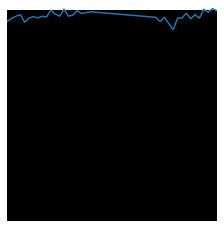

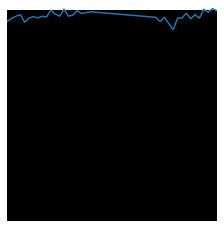

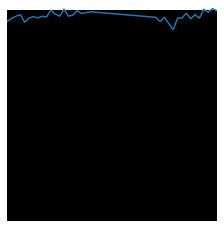

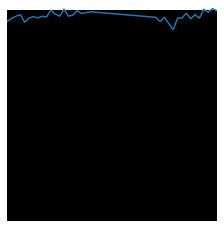

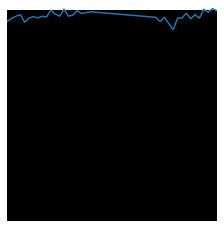

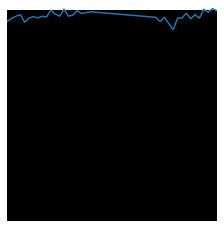

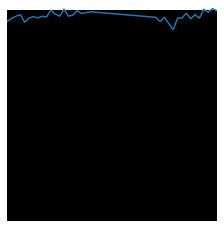

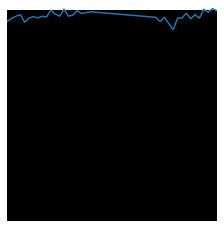

 tic1 357686299 tic1 357686299



/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


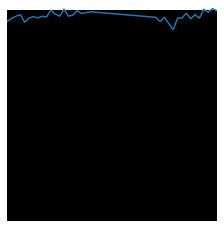

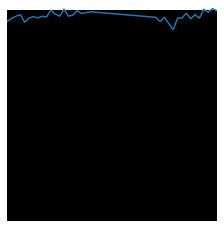

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
[0]
 tic2 357686299
[0] tic2 357686299
[0]
[0][0]
 tic2 357686299
 tic2 357686299

 tic2 357686299
[0]

 tic2 357686299
 tic2 357686299[0]



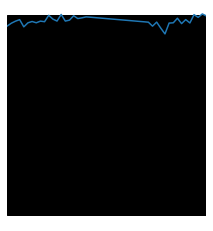

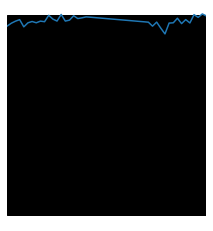

 tic2 357686299

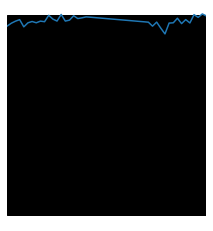

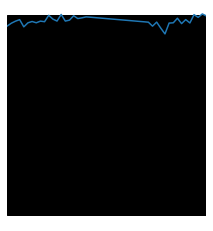

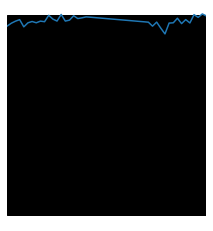

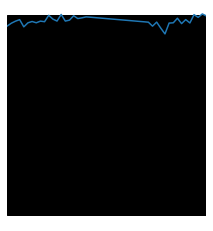

 tic1 357686299 tic1 357686299



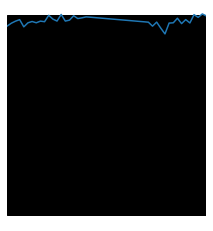

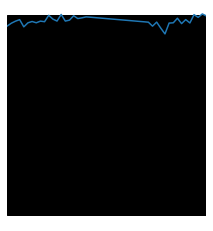

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


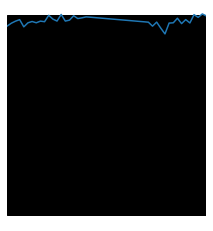

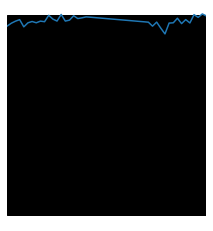

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0]

[0] tic2 357686299 tic2 357686299


[0][0] tic2 357686299


 tic2 357686299 tic2 357686299
[0]
[0]



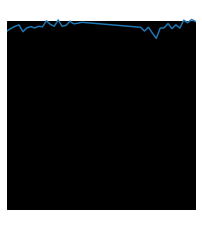

 tic2 357686299

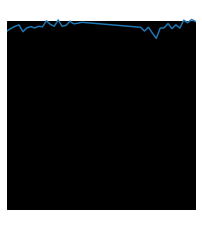

 tic2 357686299
[0]


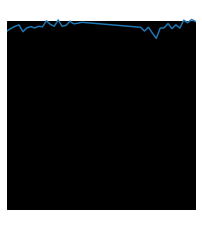

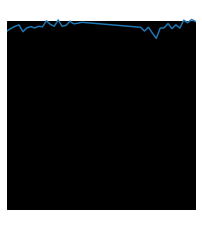

 tic2 357686299

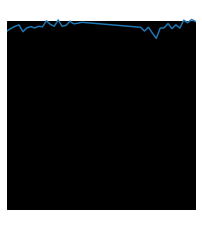

 tic1 357686299
 tic1 357686299



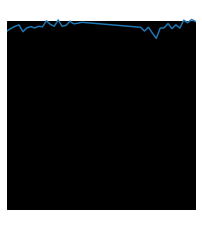

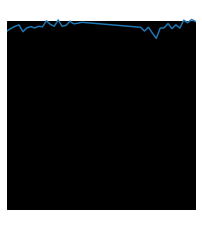

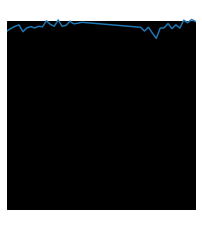

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299[0]

 tic2 357686299


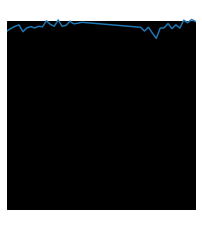

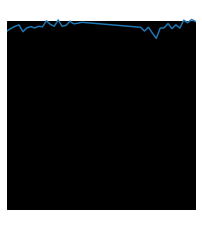

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299
 tic1 357686299








/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
[0] tic2 357686299

 tic2 357686299
[0]
 tic2 357686299


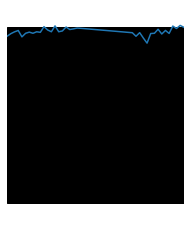

[0]

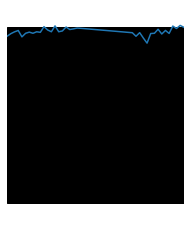


 tic2 357686299 tic1 357686299

[0][0]

 tic2 357686299


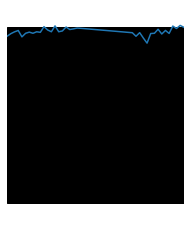

[0][0]
 tic2 357686299 tic2 357686299 tic1 357686299



 tic2 357686299


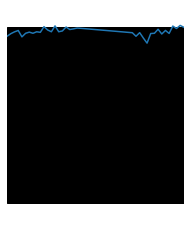

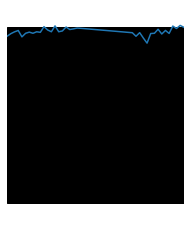

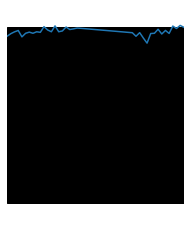

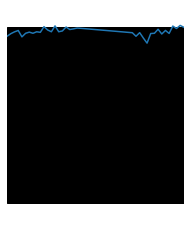

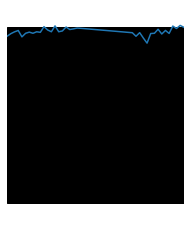

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


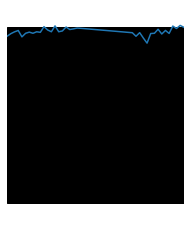

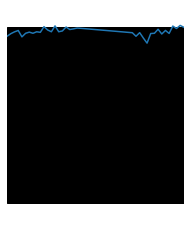

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299[0]
[0]
 tic2 357686299

[0] tic2 357686299

 tic2 357686299[0]
[0]
[0][0]


 tic2 357686299 tic2 357686299 tic2 357686299




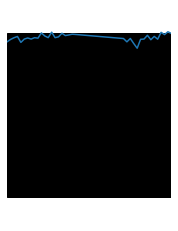

 tic2 357686299


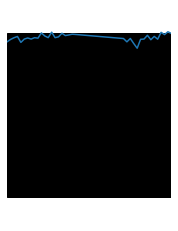

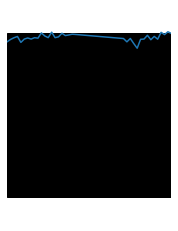

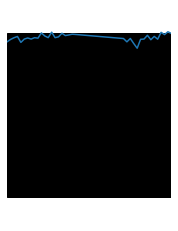

 tic1 357686299


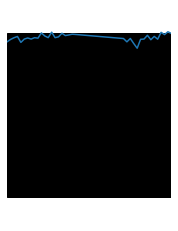

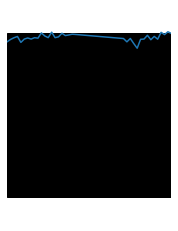

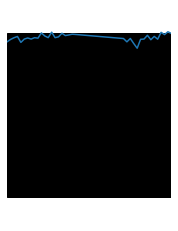

 tic1 357686299

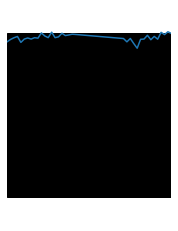

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


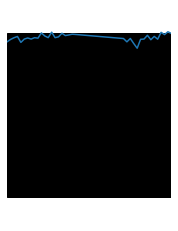

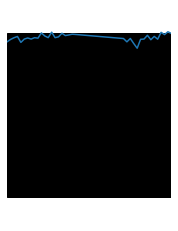

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299
 tic1 357686299








/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
[0] tic2 357686299

 tic2 357686299[0]
[0][0]


 tic2 357686299
 tic2 357686299 tic2 357686299[0]
[0]


 tic2 357686299 tic2 357686299[0]


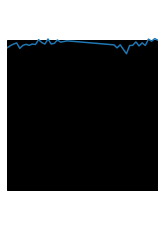

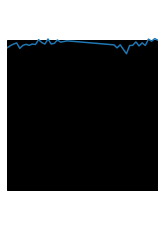

 tic2 357686299


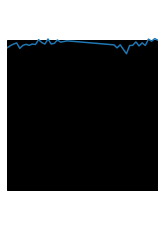

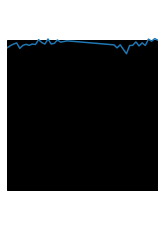

 tic1 357686299


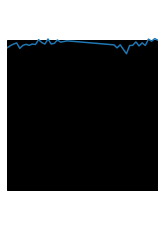

 tic1 357686299

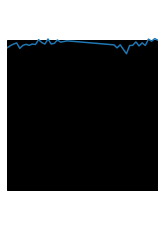

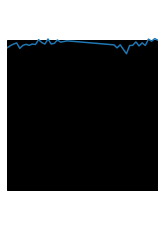

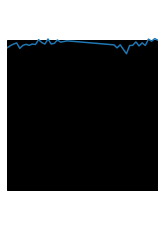

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


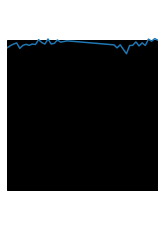

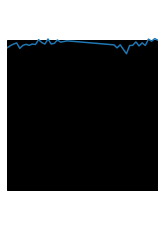

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299


 tic1 357686299






/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0][0]

 tic2 357686299 tic2 357686299[0]
[0]

 tic2 357686299

[0] tic2 357686299[0]



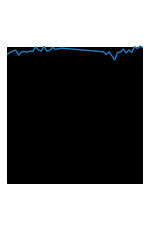


 tic2 357686299 tic2 357686299



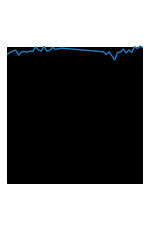

 tic1 357686299[0]



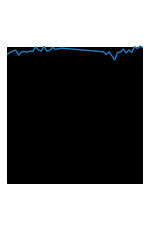

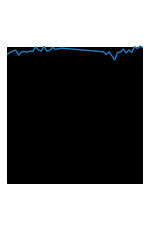

 tic2 357686299 tic1 357686299



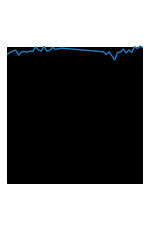

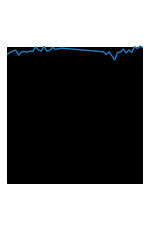

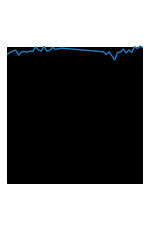

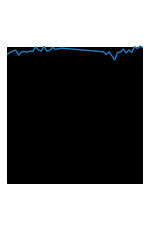

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
Process ForkPoolWorker-38:
Process ForkPoolWorker-33:
Process ForkPoolWorker-34:
Process ForkPoolWorker-36:
Process ForkPoolWorker-37:
Process ForkPoolWorker-40:
Process ForkPoolWorker-39:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/envs/spocc/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/envs/spocc/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/envs/spocc/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/envs/spocc/lib/python3.6/mu

KeyboardInterrupt: 

In [20]:
shape = "Square"
print(tic_ids)
print(f'MAG BIN: {mag_bin}')
for tic_id in tic_ids:
    pipeline(tic_id)


Below is the "chunkified" version of the pipeline

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299

 tic1 357686299 tic1 357686299 tic1 357686299







/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0][0][0]


 tic2 357686299 tic2 357686299[0]


 tic2 357686299 tic2 357686299

[0][0]
 tic2 357686299

 tic2 357686299[0]

 tic2 357686299


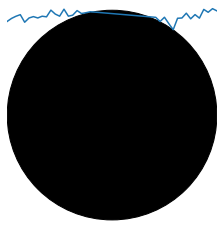

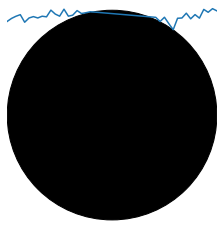

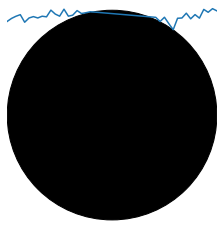

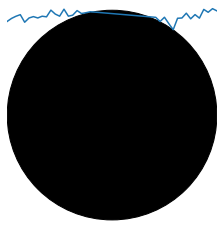

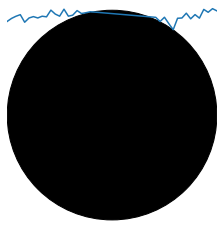

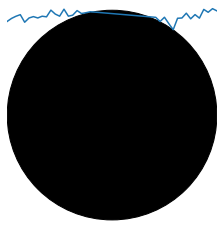

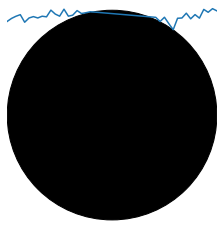

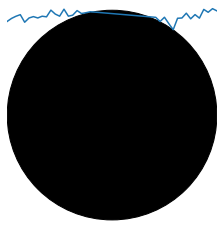

 tic1 357686299 tic1 357686299



/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
[0]
 tic2 357686299 tic2 357686299



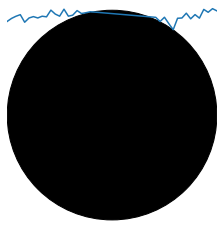

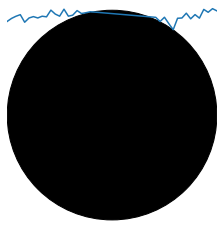

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299


 tic1 357686299
 tic1 357686299





/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299[0]

 tic2 357686299
[0]
 tic2 357686299
[0][0][0]
[0]


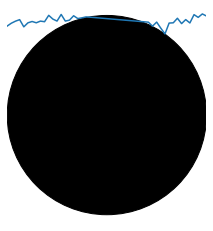

 tic2 357686299
 tic2 357686299
 tic2 357686299




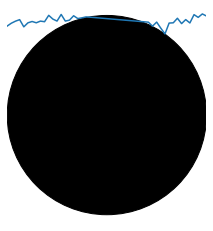

 tic2 357686299[0]
 tic2 357686299
 tic1 357686299



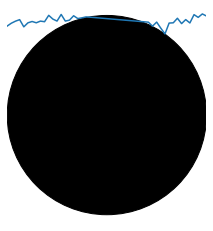

 tic1 357686299

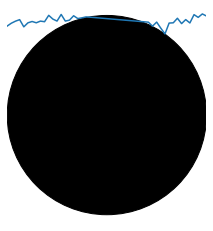

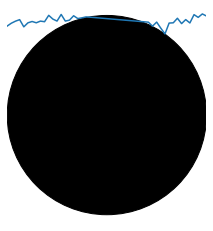

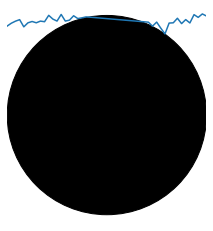

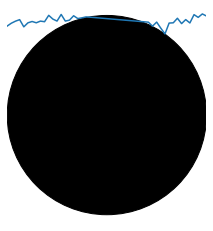

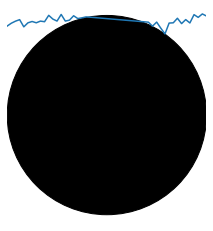

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


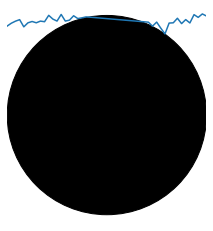

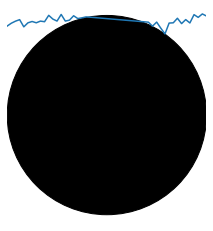

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299

 tic1 357686299







/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0][0]
 tic2 357686299
 tic2 357686299
[0]
 tic2 357686299

 tic2 357686299[0]

[0]
[0] tic2 357686299

[0] tic2 357686299


 tic2 357686299 tic2 357686299


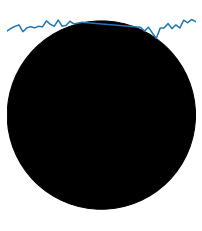

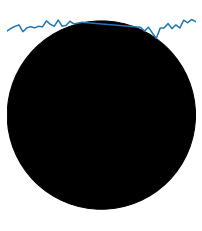

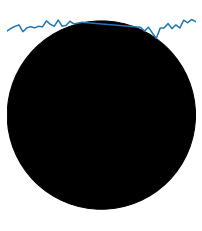

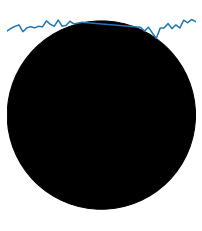

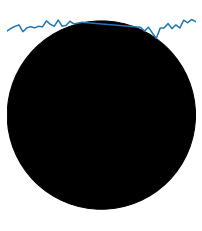

 tic1 357686299


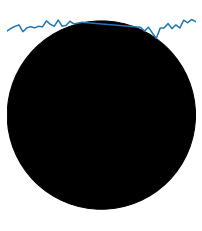

 tic1 357686299


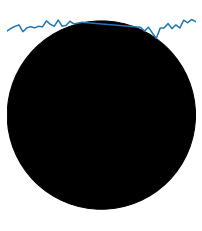

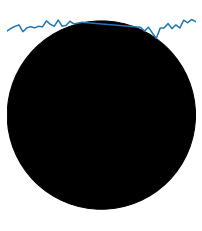

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0][0]
 tic2 357686299

 tic2 357686299


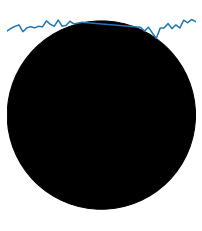

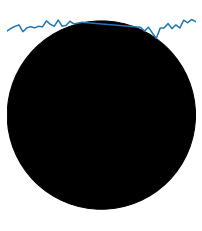

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299
 tic1 357686299








/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299[0]

 tic2 357686299[0][0]


[0]
 tic2 357686299 tic2 357686299
 tic2 357686299
[0]
[0]
[0]
 tic2 357686299 tic2 357686299




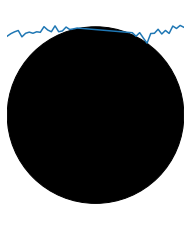

 tic2 357686299


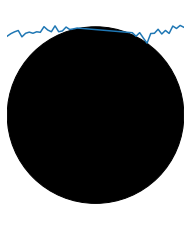

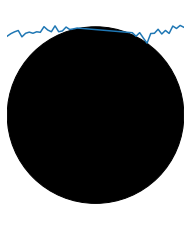

 tic1 357686299

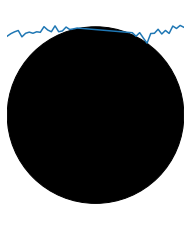

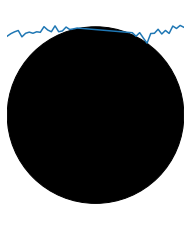

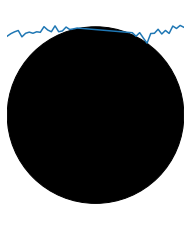

 tic1 357686299

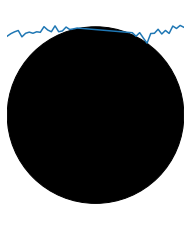

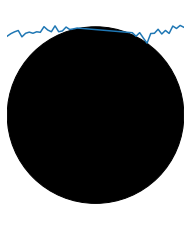

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


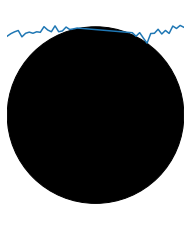

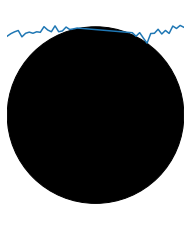

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0][0]
 tic2 357686299
[0][0]

 tic2 357686299
[0]
 tic2 357686299
[0] tic2 357686299

 tic2 357686299

 tic2 357686299
[0]
 tic2 357686299


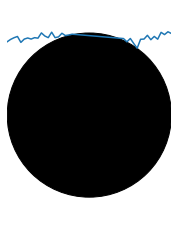

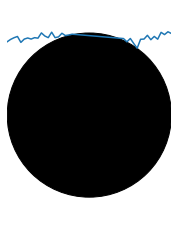

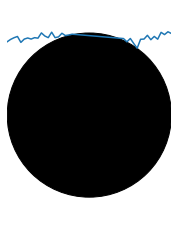

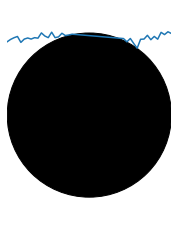

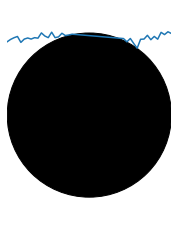

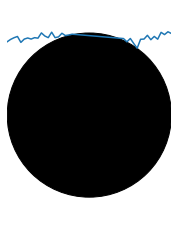

 tic1 357686299

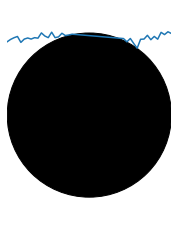

 tic1 357686299



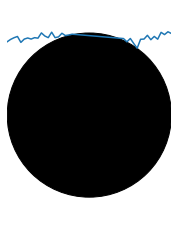

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299[0]

 tic2 357686299


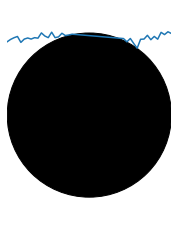

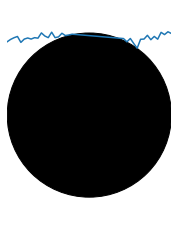

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299[0][0]

[0] tic2 357686299


 tic2 357686299 tic2 357686299
[0]
[0][0]
[0]


 tic2 357686299 tic2 357686299
 tic2 357686299 tic2 357686299




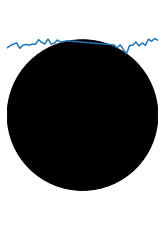

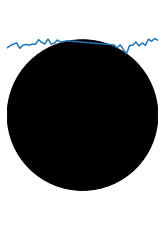

 tic1 357686299

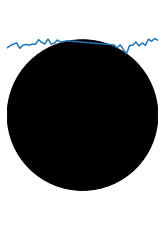

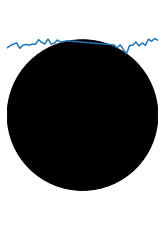

 tic1 357686299



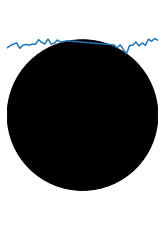

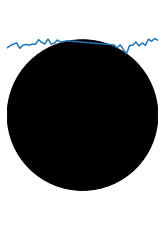

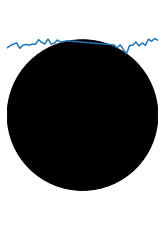

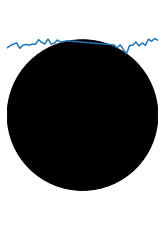

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


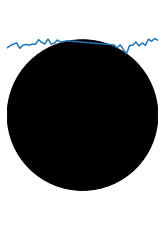

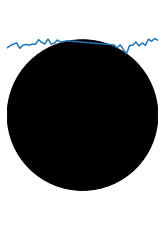

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0][0]
[0]
 tic2 357686299
 tic2 357686299
 tic2 357686299

[0][0]

[0] tic2 357686299 tic2 357686299[0]
 tic2 357686299



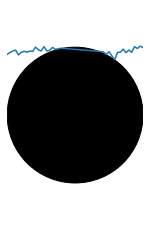

 tic2 357686299




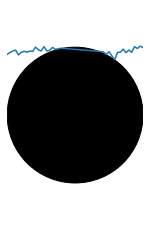

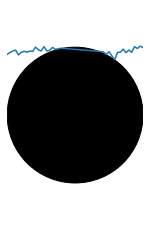

 tic1 357686299

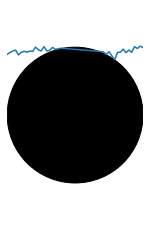

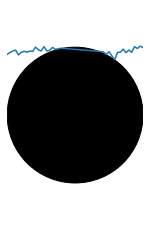

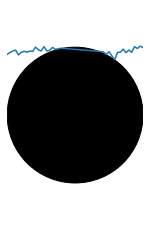

 tic1 357686299


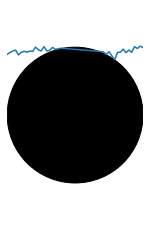

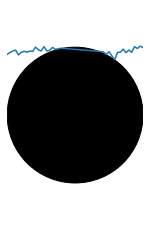

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0][0]

 tic2 357686299 tic2 357686299



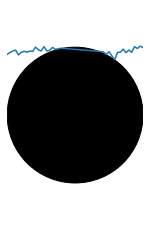

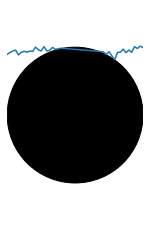

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299

 tic1 357686299







/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0]
 tic2 357686299
[0][0]
 tic2 357686299
 tic2 357686299
 tic2 357686299


[0]
[0] tic2 357686299[0]

[0]

 tic2 357686299 tic2 357686299

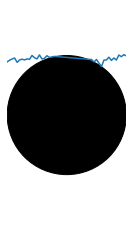

 tic2 357686299



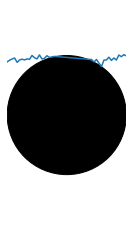

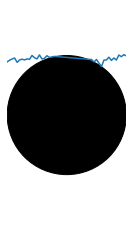

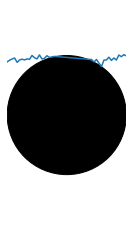

 tic1 357686299


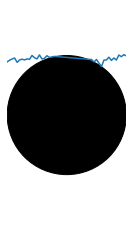

 tic1 357686299

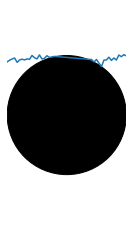

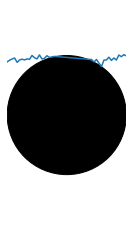

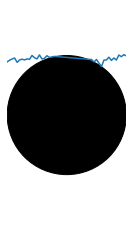

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


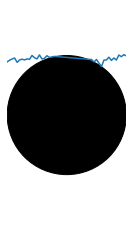

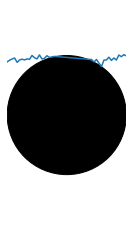

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0][0]

 tic2 357686299[0]
[0] tic2 357686299
 tic2 357686299 tic2 357686299[0]

[0]




[0] tic2 357686299 tic2 357686299
 tic2 357686299


 tic2 357686299


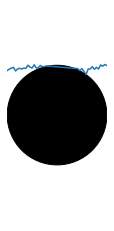

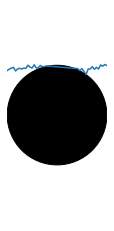

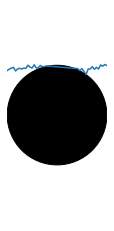

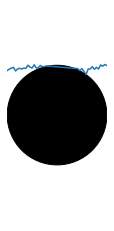

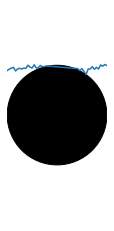

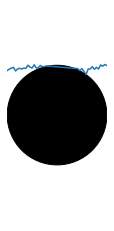

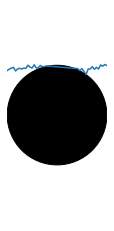

 tic1 357686299 tic1 357686299



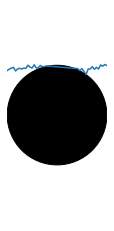

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


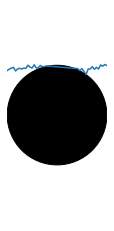

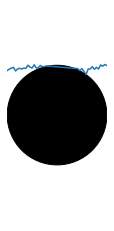

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
[0][0] tic2 357686299[0]

[0]

 tic2 357686299 tic2 357686299
 tic2 357686299
[0][0]


 tic2 357686299 tic2 357686299
[0]

 tic2 357686299

 tic2 357686299

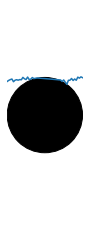

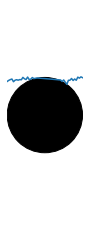

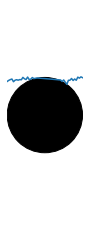

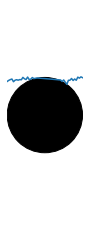

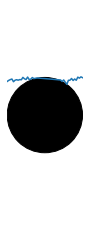

 tic1 357686299

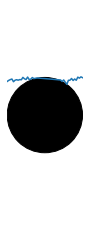

 tic1 357686299

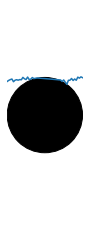

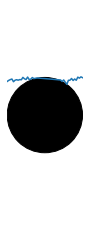

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


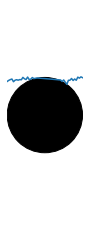

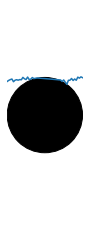

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0][0]
[0]
 tic2 357686299[0] tic2 357686299


[0][0]
 tic2 357686299



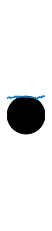

 tic2 357686299
 tic2 357686299
 tic2 357686299[0]


 tic2 357686299 tic1 357686299



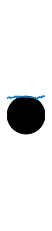

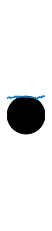

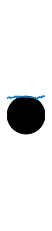

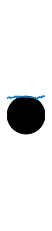

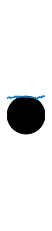

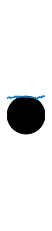

 tic1 357686299


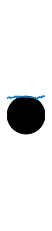

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]

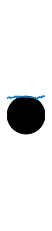


 tic2 357686299


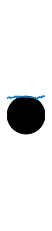

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
[0] tic2 357686299

 tic2 357686299[0]

 tic2 357686299
[0][0][0]


 tic2 357686299 tic2 357686299
 tic2 357686299
[0]

[0]


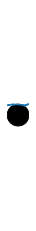

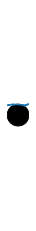

 tic2 357686299

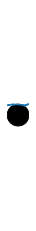


 tic2 357686299


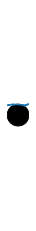

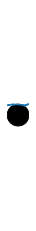

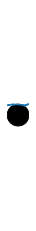

 tic1 357686299 tic1 357686299



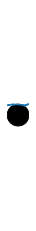

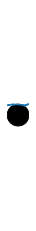

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


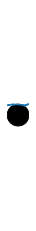

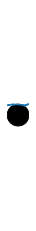

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299



 tic1 357686299





/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0]

[0]
[0]
 tic2 357686299 tic2 357686299 tic2 357686299
 tic2 357686299


[0]
[0][0]

[0] tic2 357686299 tic2 357686299
 tic2 357686299
 tic2 357686299




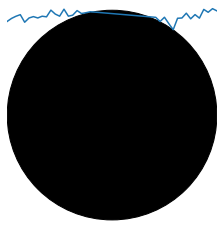

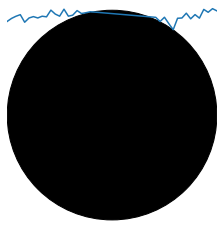

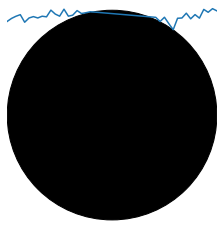

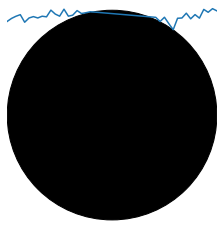

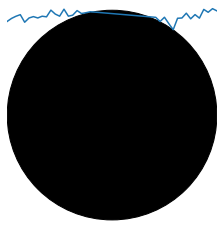

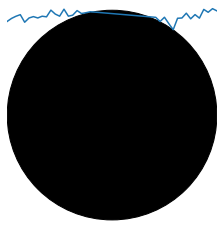

 tic1 357686299 tic1 357686299



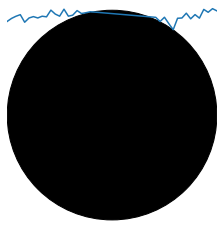

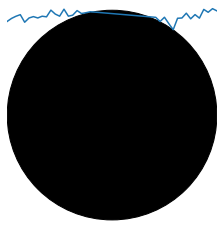

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


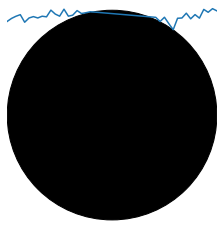

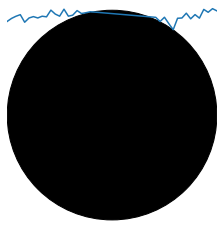

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299




 tic1 357686299




/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0]
[0] tic2 357686299[0]

[0] tic2 357686299
[0]


 tic2 357686299 tic2 357686299
[0]

 tic2 357686299[0]
 tic2 357686299

 tic2 357686299

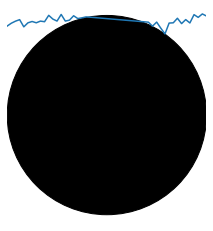

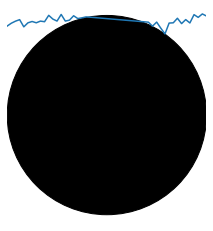

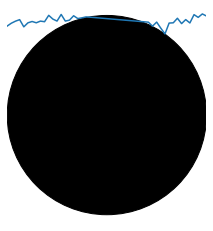

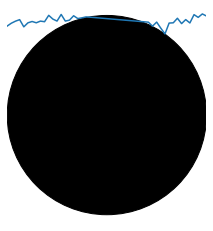

 tic1 357686299

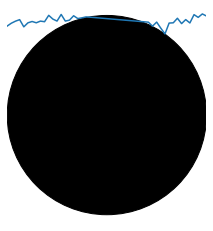


 tic1 357686299

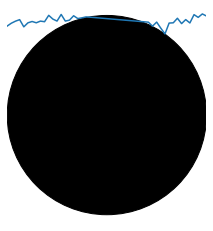

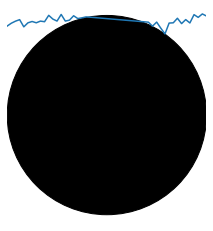

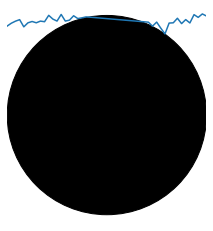

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


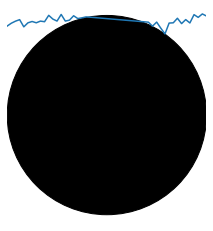

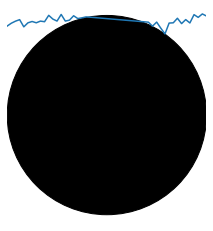

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0]
 tic2 357686299

[0][0][0]
 tic2 357686299

 tic2 357686299
 tic2 357686299

 tic2 357686299[0]

 tic2 357686299[0]

[0]

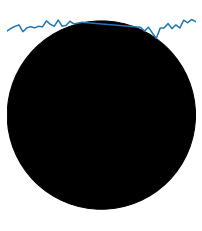

 tic2 357686299

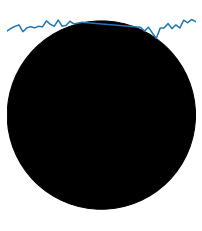



 tic2 357686299

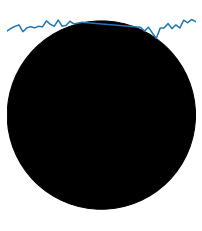

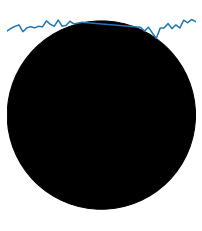


 tic1 357686299

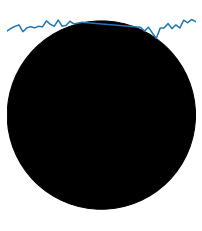

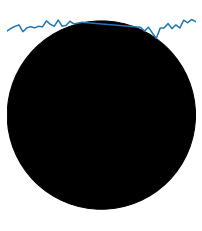

 tic1 357686299


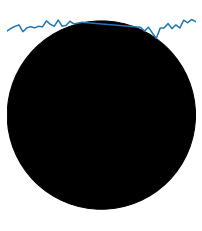

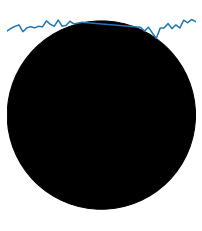

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


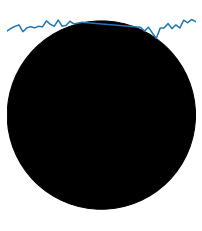

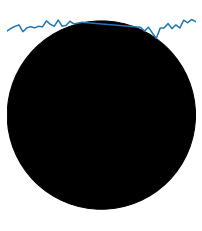

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0]
[0] tic2 357686299[0][0]



 tic2 357686299[0]

 tic2 357686299 tic2 357686299 tic2 357686299


[0][0]

 tic2 357686299

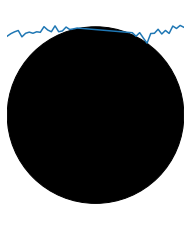

 tic2 357686299



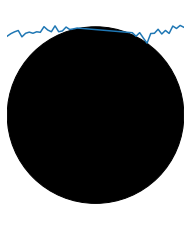

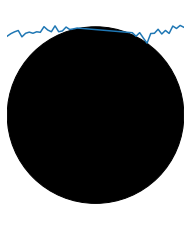

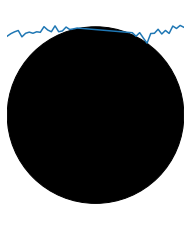

 tic1 357686299

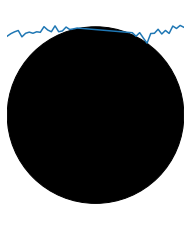

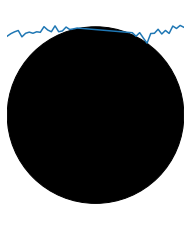

 tic1 357686299

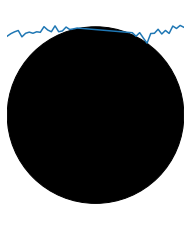

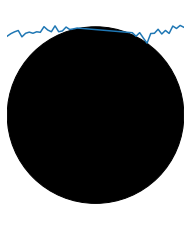

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


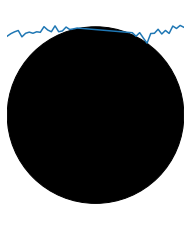

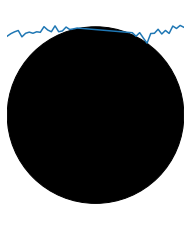

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0][0]
 tic2 357686299
[0]


 tic2 357686299[0] tic2 357686299


 tic2 357686299[0] tic2 357686299[0]


 tic2 357686299[0] tic2 357686299


 tic2 357686299



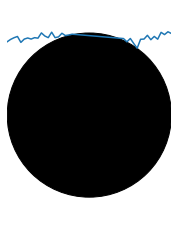

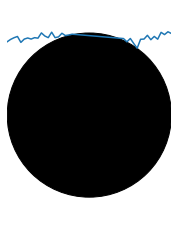

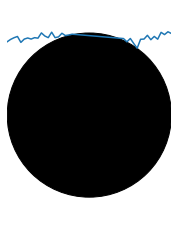

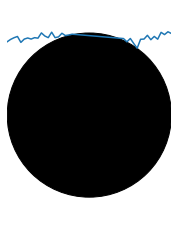

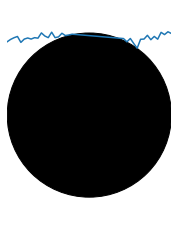

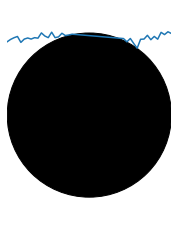

 tic1 357686299

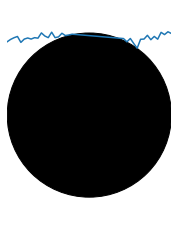


 tic1 357686299

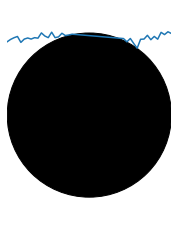

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0][0]

 tic2 357686299 tic2 357686299



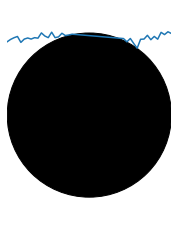

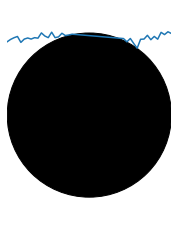

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299



 tic1 357686299





/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0]
[0]
 tic2 357686299[0] tic2 357686299

[0][0]

 tic2 357686299

 tic2 357686299 tic2 357686299
[0]
[0] tic2 357686299


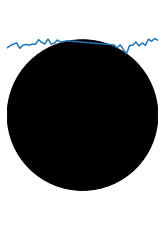



 tic2 357686299
 tic1 357686299


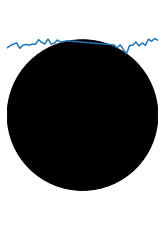

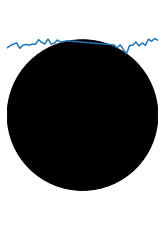

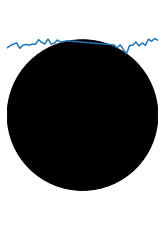

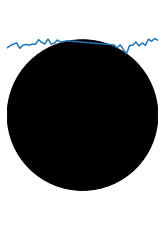

 tic1 357686299

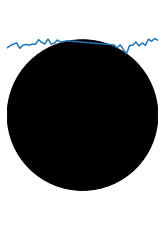

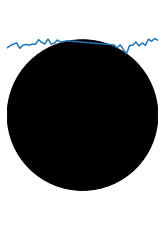

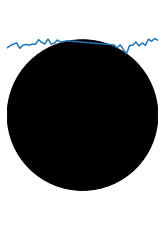

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


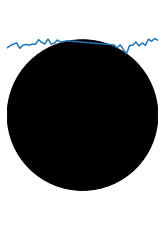

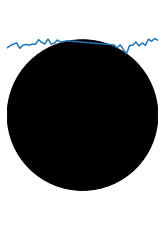

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299
 tic1 357686299








/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299[0]

 tic2 357686299
[0][0]
[0]
 tic2 357686299
 tic2 357686299[0]
 tic2 357686299


[0]

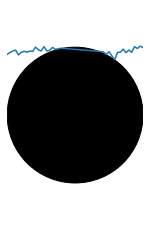

[0]

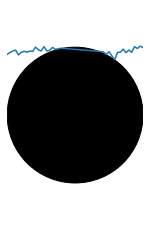



 tic2 357686299 tic2 357686299 tic2 357686299

 tic1 357686299
 tic1 357686299



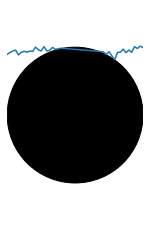

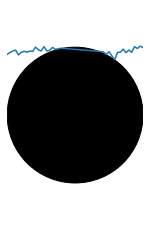

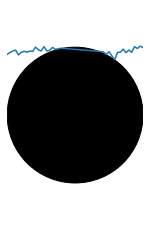

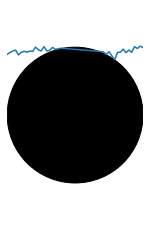

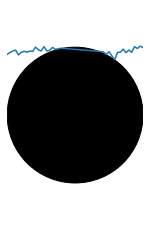

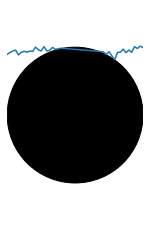

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


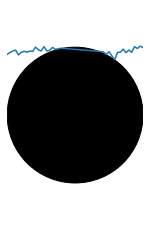

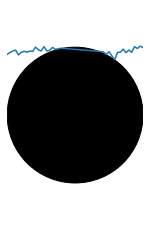

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299
 tic1 357686299








/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
[0]
 tic2 357686299[0][0]
 tic2 357686299
[0]
[0]
 tic2 357686299
 tic2 357686299
[0]

 tic2 357686299

 tic2 357686299
 tic2 357686299
[0]

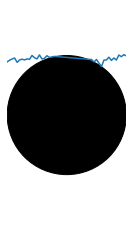

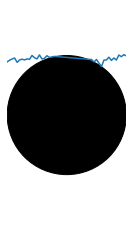

 tic2 357686299

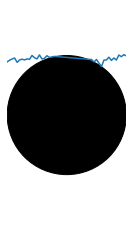

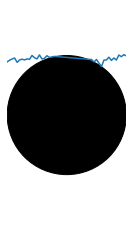

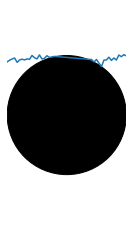


 tic1 357686299

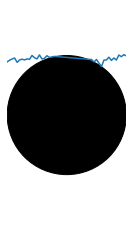

 tic1 357686299



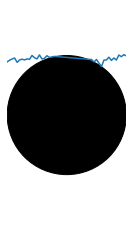

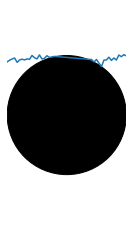

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


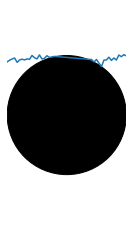

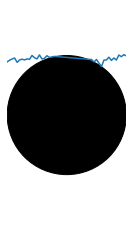

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0]
 tic2 357686299
[0][0]

 tic2 357686299
 tic2 357686299
[0]
 tic2 357686299[0][0]
 tic2 357686299



 tic2 357686299 tic2 357686299
[0]
 tic2 357686299



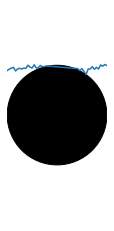

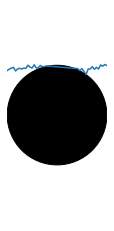

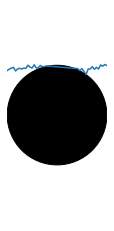

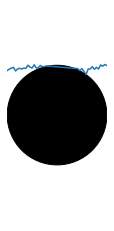

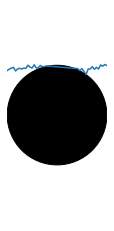

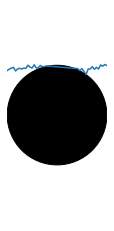

 tic1 357686299


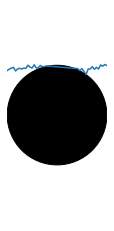

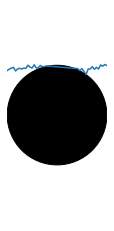

 tic1 357686299


/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


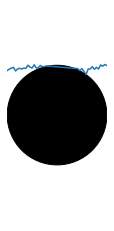

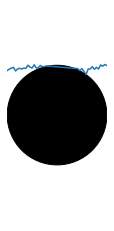

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299
 tic1 357686299 tic1 357686299








/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299[0][0]


 tic2 357686299
[0] tic2 357686299
[0]

 tic2 357686299 tic2 357686299

[0]

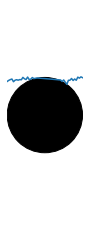

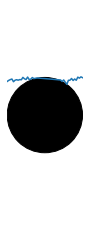

[0] tic2 357686299
 tic2 357686299


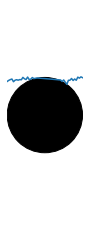


 tic1 357686299

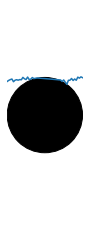

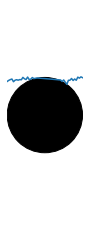

 tic1 357686299


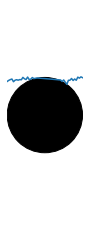

[0]


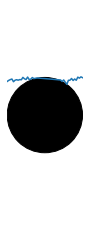

 tic2 357686299


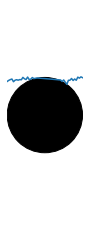

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


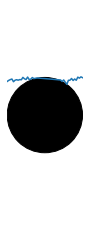

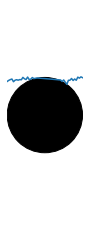

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0]
 tic2 357686299[0]

 tic2 357686299

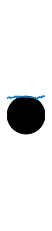


[0]
 tic1 357686299[0]

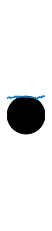


 tic2 357686299 tic2 357686299[0]

 tic2 357686299

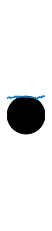

[0]



 tic2 357686299
 tic1 357686299


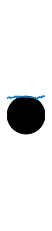

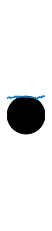

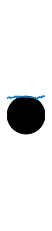

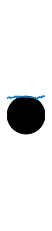

[0]
 tic2 357686299


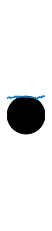

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299


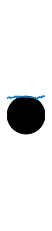

[0]
 tic2 357686299


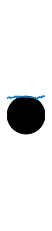

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299
 tic1 357686299




 tic1 357686299



/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0]
[0] tic2 357686299

 tic2 357686299[0]
[0]
[0] tic2 357686299

 tic2 357686299
[0]

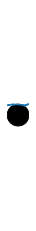

[0]
 tic2 357686299


 tic2 357686299

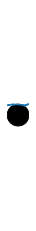

 tic2 357686299
 tic1 357686299

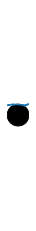

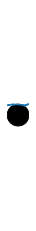

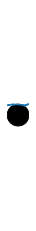


 tic1 357686299


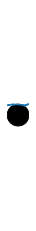

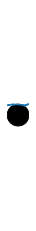

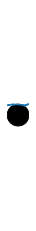

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


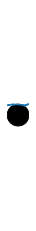

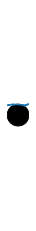

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299


 tic1 357686299






/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0]
[0] tic2 357686299

[0]
[0] tic2 357686299
[0]
 tic2 357686299[0]
 tic2 357686299
 tic2 357686299

[0]



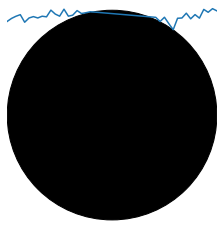

 tic2 357686299 tic2 357686299



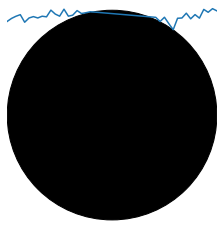

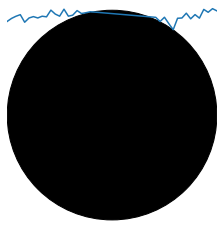

 tic1 357686299

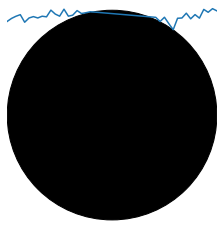

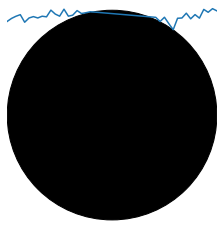

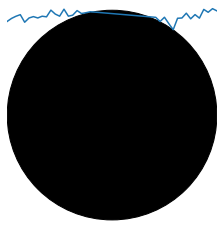


 tic1 357686299

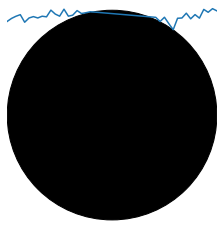

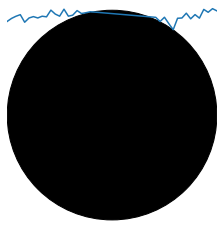

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


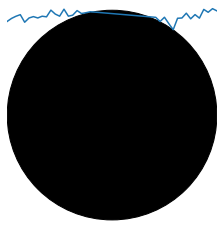

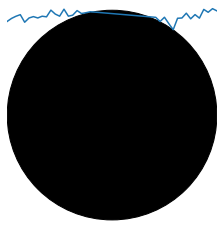

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299





 tic1 357686299



/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0][0]
[0][0]
 tic2 357686299

[0] tic2 357686299


 tic2 357686299[0]
 tic2 357686299
 tic2 357686299
 tic2 357686299

[0]

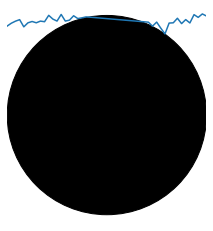

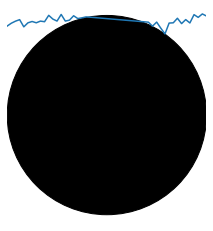


 tic2 357686299


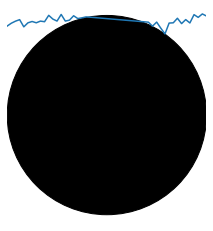

 tic1 357686299

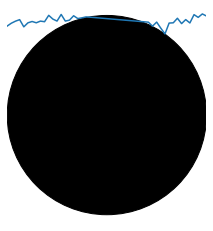

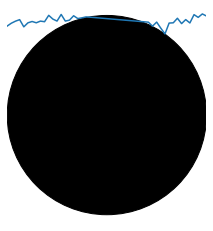

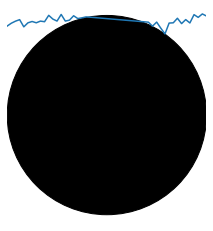


 tic1 357686299

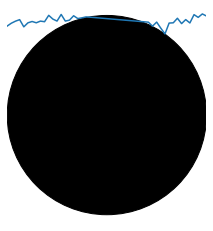

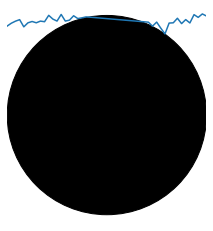

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


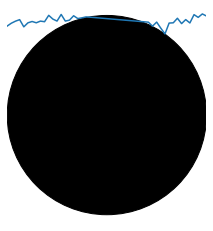

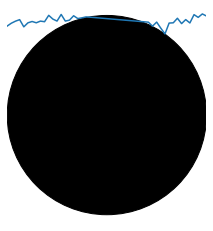

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0][0]
[0] tic2 357686299[0]


[0][0]

 tic2 357686299 tic2 357686299 tic2 357686299

 tic2 357686299
 tic2 357686299


[0]
 tic2 357686299


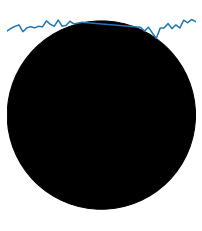

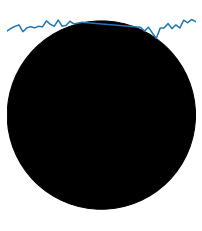

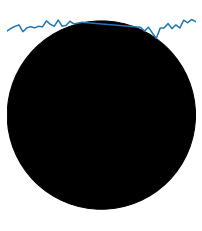

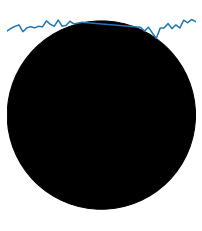

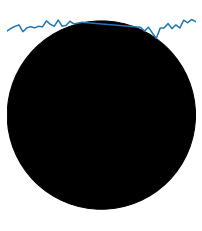

 tic1 357686299

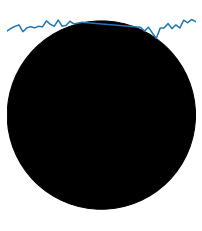

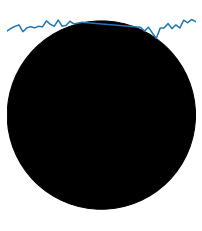

 tic1 357686299


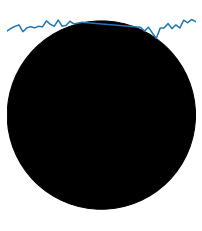

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


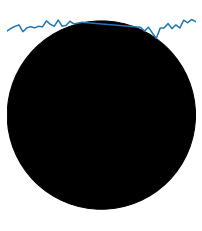

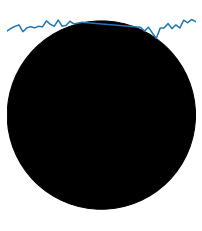

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299
 tic1 357686299 tic1 357686299

 tic1 357686299






/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0][0]
 tic2 357686299

[0]
 tic2 357686299 tic2 357686299[0]

 tic2 357686299
[0]

[0]
[0]

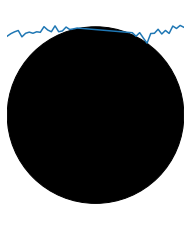


 tic2 357686299
 tic2 357686299
 tic2 357686299

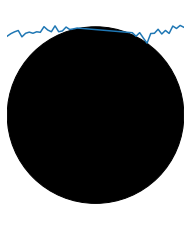

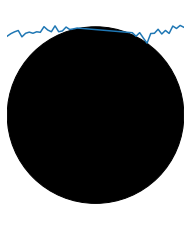

 tic1 357686299

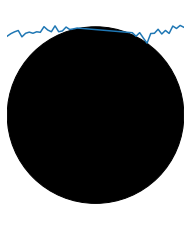

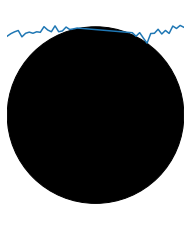

 tic1 357686299


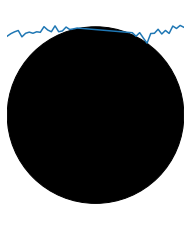

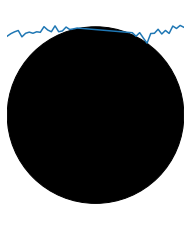

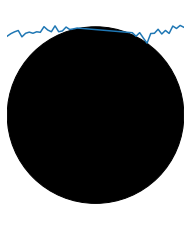

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


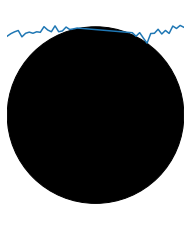

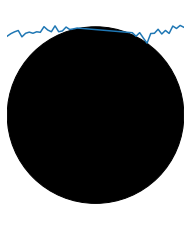

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0]

 tic2 357686299[0]
 tic2 357686299
 tic2 357686299
[0]

[0][0]
 tic2 357686299[0]
 tic2 357686299
 tic2 357686299

 tic2 357686299



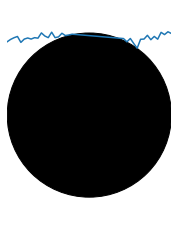

[0]
 tic2 357686299

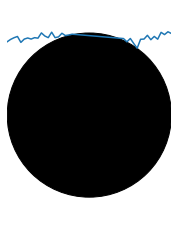

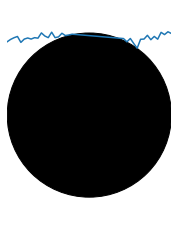

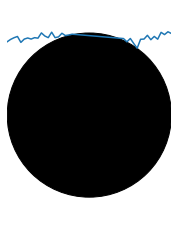

 tic1 357686299

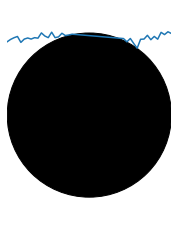

 tic1 357686299



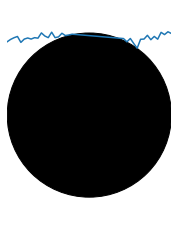

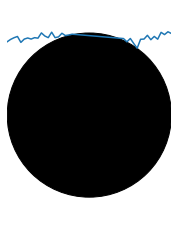

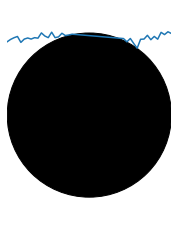

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
[0] tic2 357686299

 tic2 357686299


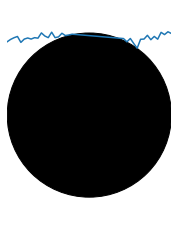

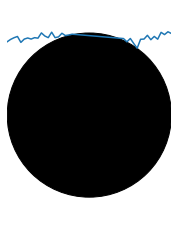

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299





 tic1 357686299



/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299[0]

 tic2 357686299[0]

 tic2 357686299[0]
[0][0]

[0] tic2 357686299 tic2 357686299


 tic2 357686299

[0] tic2 357686299

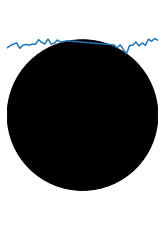



 tic2 357686299

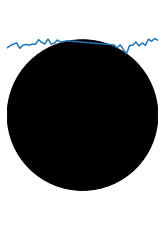

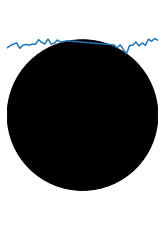

 tic1 357686299


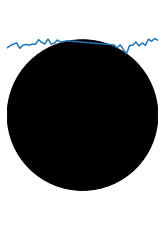

 tic1 357686299

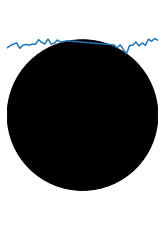

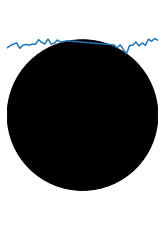

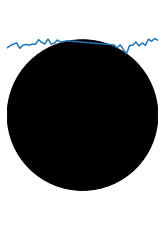

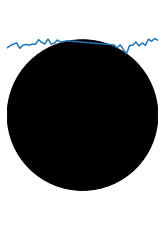

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


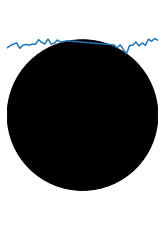

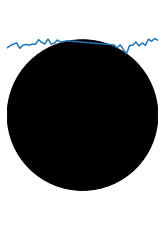

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299

 tic1 357686299







/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0]
 tic2 357686299[0]
[0]

 tic2 357686299[0]
 tic2 357686299



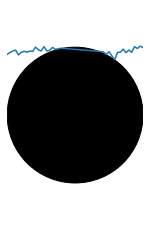

[0]
[0]
 tic2 357686299 tic2 357686299
 tic2 357686299
[0]
 tic1 357686299

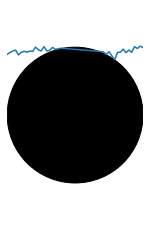



 tic2 357686299

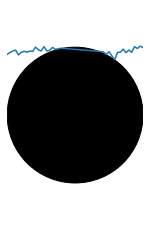

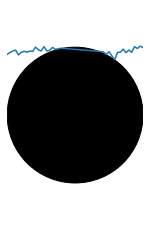

 tic1 357686299


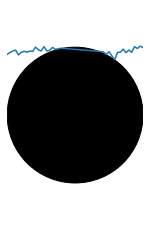

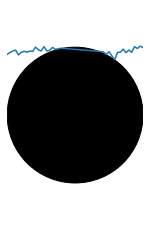

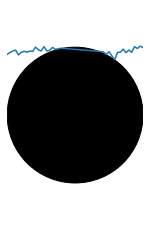

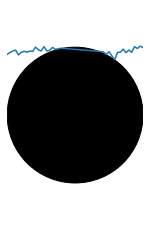

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


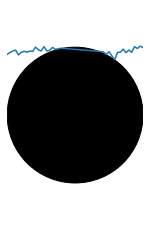

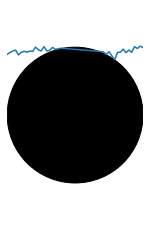

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0]

[0]
 tic2 357686299
[0][0]
 tic2 357686299
 tic2 357686299
 tic2 357686299

 tic2 357686299[0]
[0]


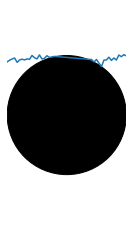


 tic2 357686299[0]

 tic2 357686299 tic2 357686299



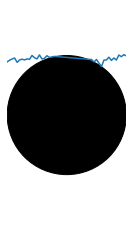

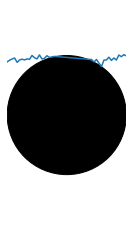

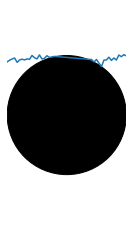

 tic1 357686299


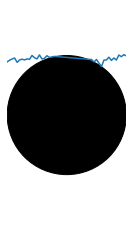

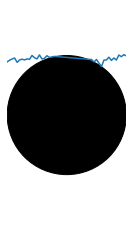

 tic1 357686299


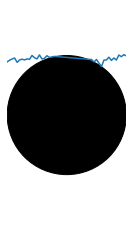

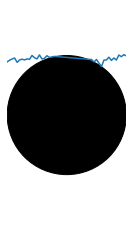

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


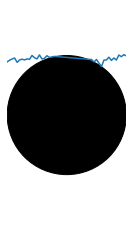

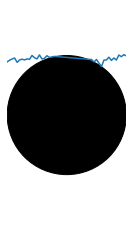

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299[0][0]


 tic2 357686299[0] tic2 357686299[0]



 tic2 357686299 tic2 357686299[0][0]
[0]
 tic2 357686299



 tic2 357686299 tic2 357686299



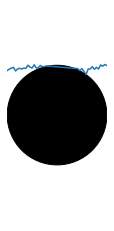

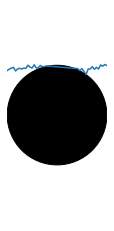

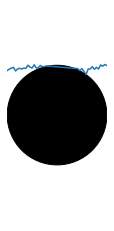

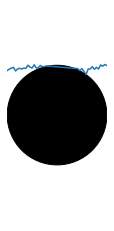

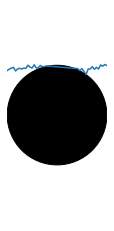

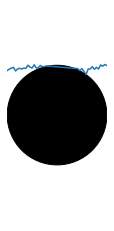

 tic1 357686299 tic1 357686299



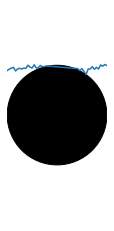

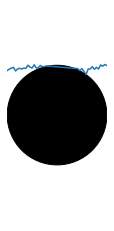

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


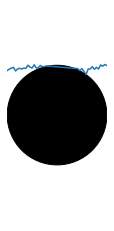

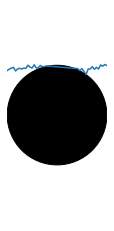

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299
 tic1 357686299








/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0]

 tic2 357686299 tic2 357686299[0]


[0]
 tic2 357686299
[0] tic2 357686299[0]

 tic2 357686299
[0] tic2 357686299


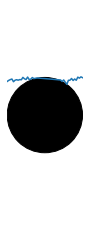



 tic2 357686299

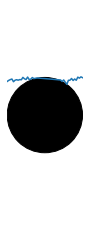

[0]



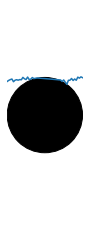

 tic2 357686299


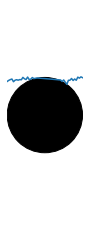

 tic1 357686299 tic1 357686299


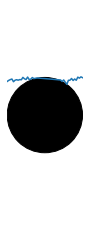

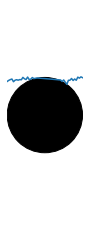

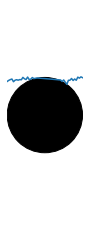

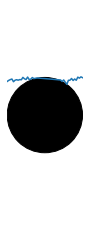

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


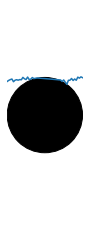

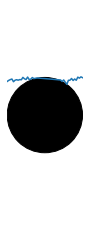

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0]
[0]
 tic2 357686299 tic2 357686299
[0]

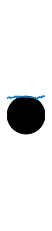



[0][0]

 tic2 357686299 tic2 357686299

[0] tic2 357686299
 tic1 357686299

[0] tic2 357686299


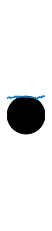

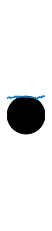

 tic2 357686299


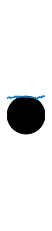

 tic1 357686299

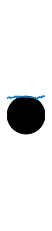

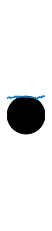

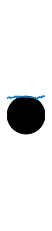

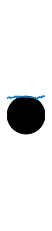

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299


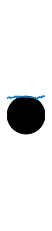

[0]
 tic2 357686299


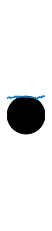

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0][0][0]


 tic2 357686299 tic2 357686299 tic2 357686299


[0]
[0] tic2 357686299

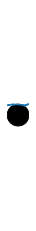



 tic2 357686299

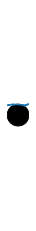

[0]

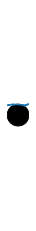

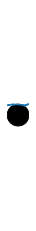

[0]

 tic1 357686299 tic2 357686299

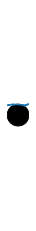



 tic1 357686299
 tic2 357686299


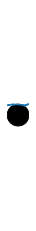

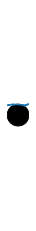

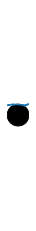

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


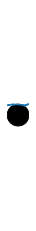

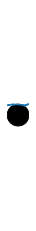

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0][0]
 tic2 357686299[0]


 tic2 357686299[0] tic2 357686299
 tic2 357686299[0]

[0]
 tic2 357686299
[0]


 tic2 357686299 tic2 357686299

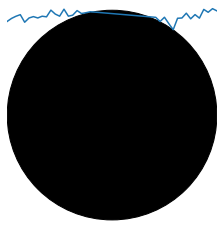

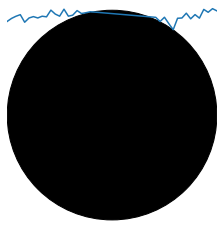

 tic1 357686299

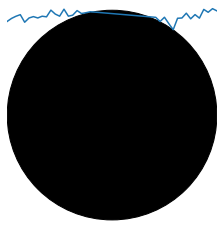

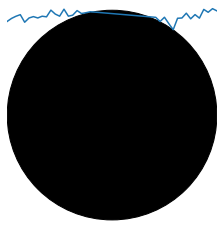

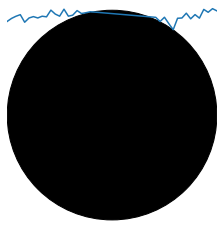

 tic1 357686299

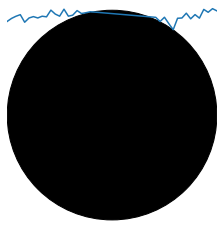

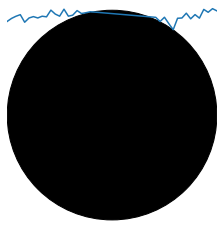

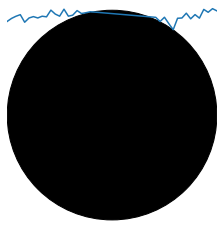

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


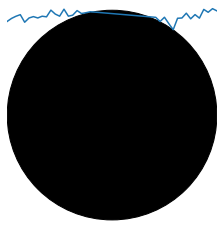

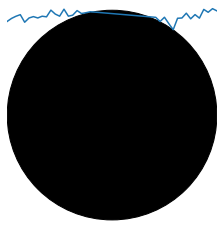

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0]
[0][0] tic2 357686299
 tic2 357686299
[0]
[0]
 tic2 357686299
[0]


 tic2 357686299 tic2 357686299 tic2 357686299




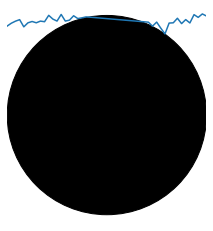

[0]
 tic2 357686299

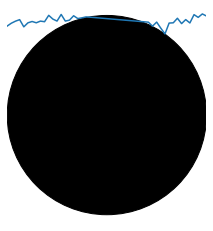


 tic1 357686299

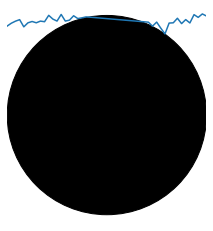

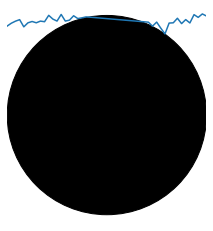

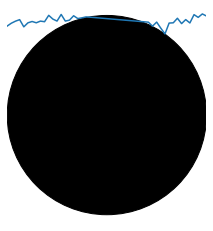

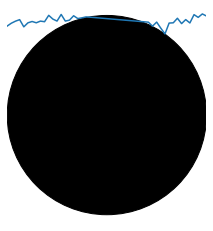

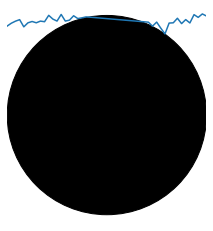

 tic1 357686299


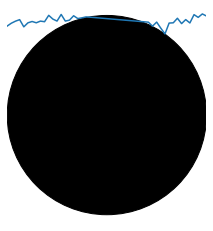

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


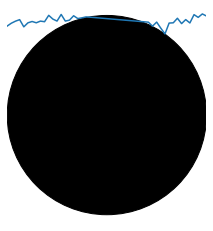

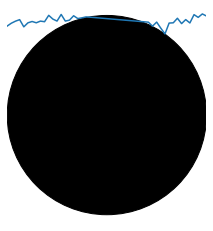

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0]
 tic2 357686299
[0][0]

 tic2 357686299
[0][0] tic2 357686299



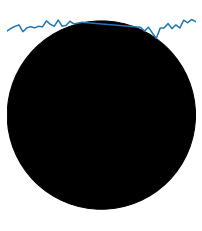

[0] tic2 357686299 tic2 357686299


 tic2 357686299
[0]

 tic2 357686299 tic1 357686299


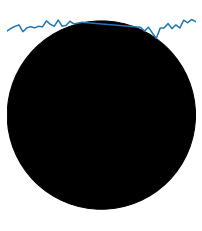

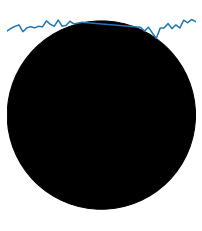

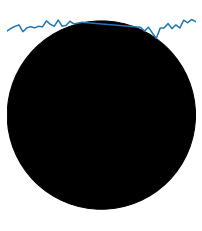

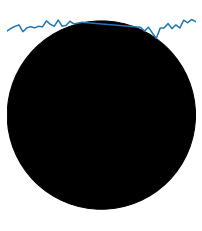

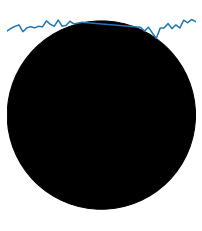

 tic1 357686299

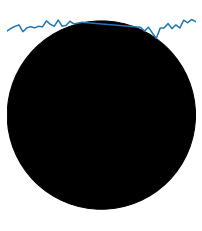

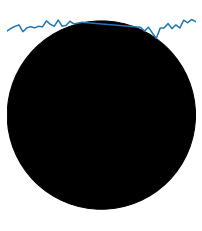

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


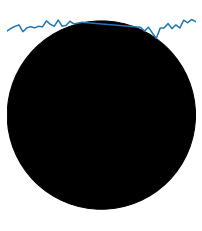

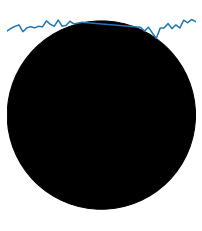

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299

 tic1 357686299







/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299[0]

[0]
[0]
 tic2 357686299
 tic2 357686299[0][0]
 tic2 357686299
[0]

 tic2 357686299 tic2 357686299


[0]
 tic2 357686299 tic2 357686299



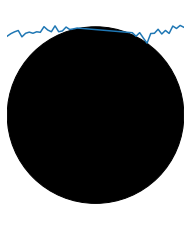

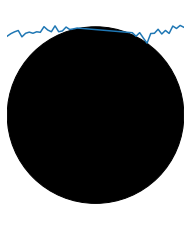

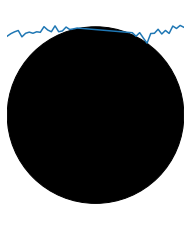

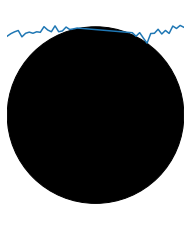

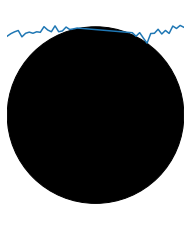

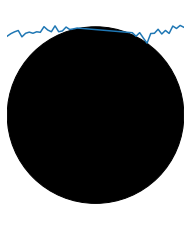

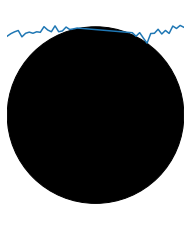

 tic1 357686299
 tic1 357686299

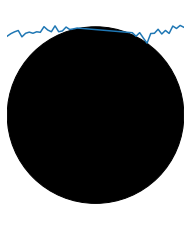

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


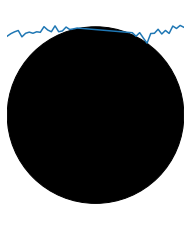

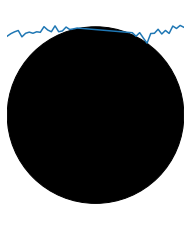

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299


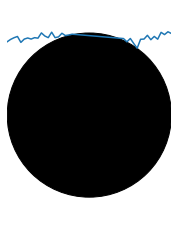

 tic1 357686299
[0]
 tic2 357686299
[0]
 tic2 357686299[0]



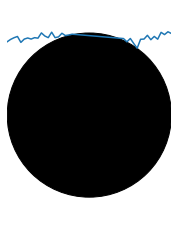

 tic2 357686299[0]

 tic2 357686299
[0] tic1 357686299

 tic2 357686299

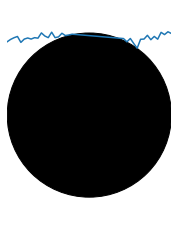


[0]


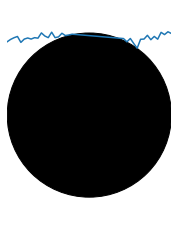

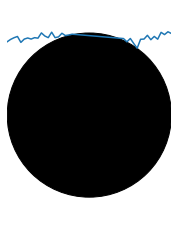

 tic2 357686299


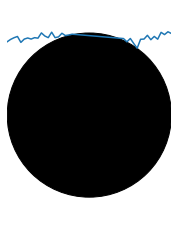

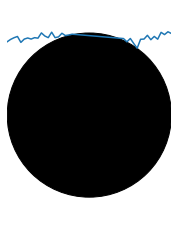

[0]
 tic2 357686299


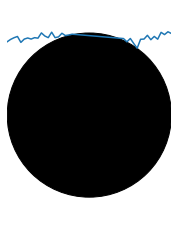

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299


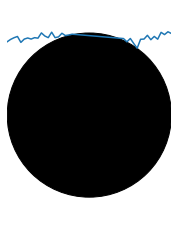

[0]
 tic2 357686299


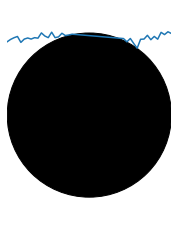

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0]

 tic2 357686299 tic2 357686299
[0][0]

 tic2 357686299[0]
 tic2 357686299

 tic2 357686299
[0]

[0][0] tic2 357686299


 tic2 357686299


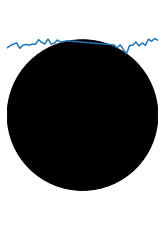

 tic2 357686299

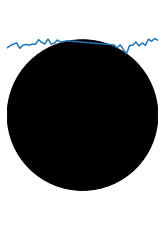

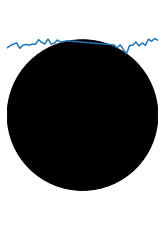

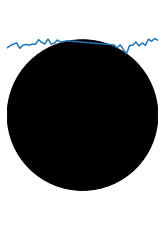

 tic1 357686299
 tic1 357686299

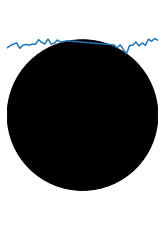

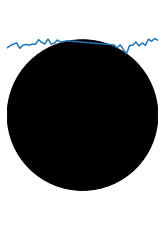

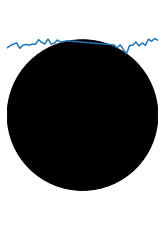

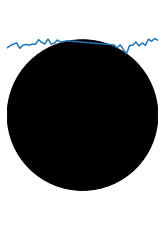

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


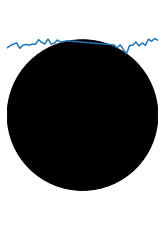

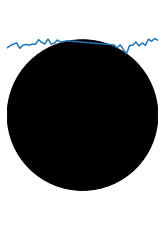

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299

 tic1 357686299







/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299[0][0]
[0]


 tic2 357686299 tic2 357686299 tic2 357686299
[0]

[0]

 tic2 357686299[0]

 tic2 357686299
[0] tic2 357686299


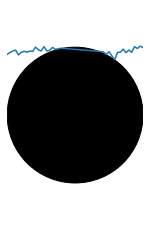

 tic2 357686299



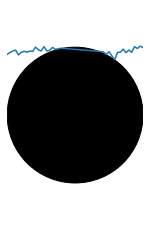

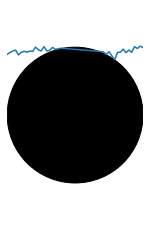

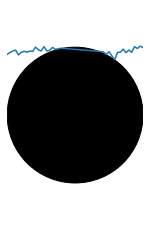

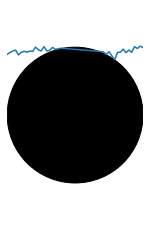

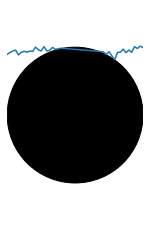

 tic1 357686299 tic1 357686299



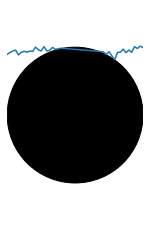

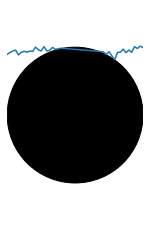

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


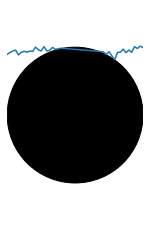

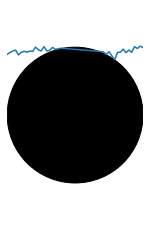

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
[0] tic2 357686299[0]


 tic2 357686299[0][0]
 tic2 357686299


 tic2 357686299
 tic2 357686299
[0][0]
[0]
 tic2 357686299 tic2 357686299

 tic2 357686299



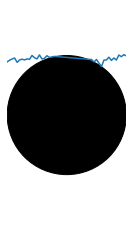

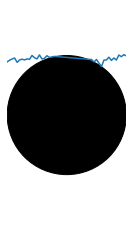

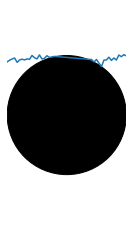

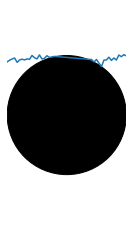

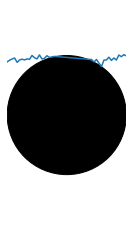

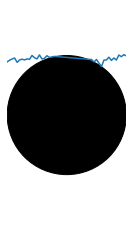

 tic1 357686299 tic1 357686299

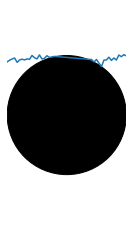

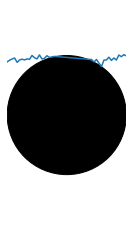

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


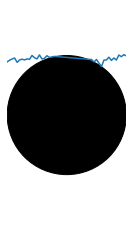

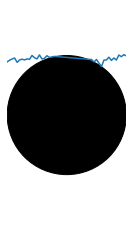

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299

 tic1 357686299







/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299[0]

[0][0] tic2 357686299

 tic2 357686299
[0]
 tic2 357686299[0]
[0]
 tic2 357686299


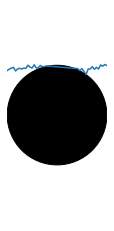



 tic2 357686299 tic2 357686299

[0]
 tic2 357686299


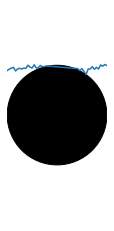

 tic1 357686299


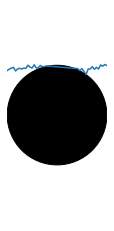

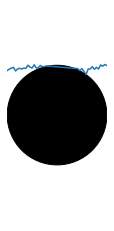

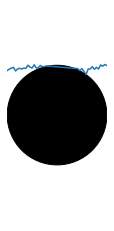

 tic1 357686299


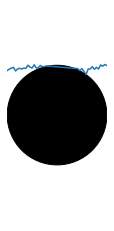

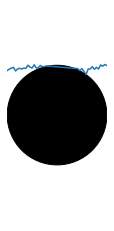

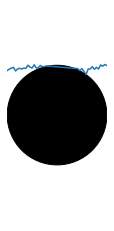

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


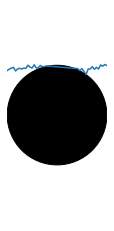

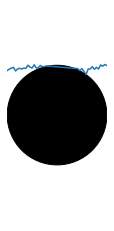

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299
 tic1 357686299








/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
[0]
 tic2 357686299[0] tic2 357686299[0][0]


 tic2 357686299
[0]


 tic2 357686299 tic2 357686299[0]
 tic2 357686299
 tic2 357686299


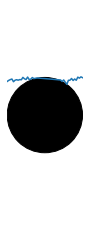



[0]

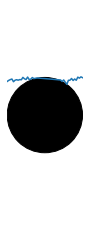


 tic2 357686299

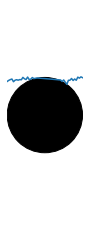

 tic1 357686299



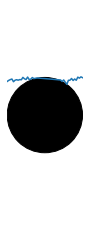

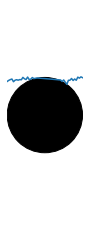

 tic1 357686299


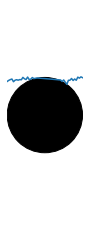

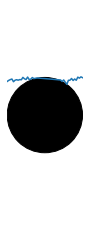

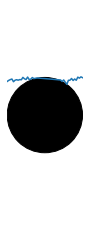

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


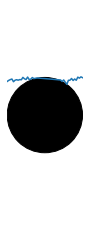

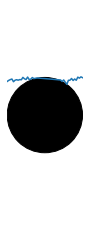

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299





 tic1 357686299



/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0]
[0][0]

 tic2 357686299 tic2 357686299 tic2 357686299[0]



 tic2 357686299[0]

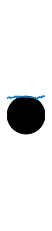


[0][0]


 tic2 357686299 tic2 357686299 tic2 357686299



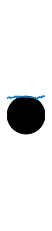

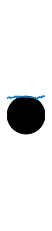

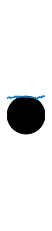

 tic1 357686299 tic1 357686299

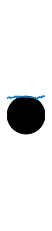

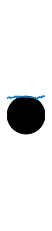

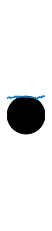

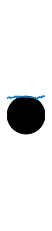

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


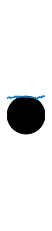

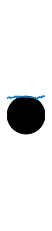

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0]
[0][0]

 tic2 357686299 tic2 357686299[0]

 tic2 357686299 tic2 357686299

[0][0][0]

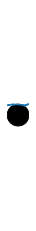





 tic2 357686299
 tic2 357686299 tic2 357686299

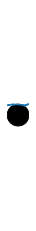

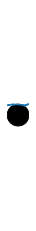



 tic1 357686299

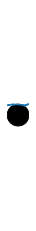


 tic1 357686299


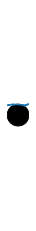

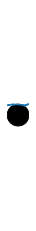

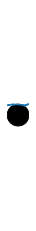

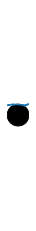

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


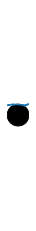

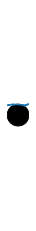

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0]
 tic2 357686299[0]

 tic2 357686299[0][0][0]


 tic2 357686299
 tic2 357686299
 tic2 357686299

[0]


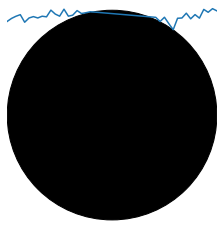

 tic2 357686299
[0]


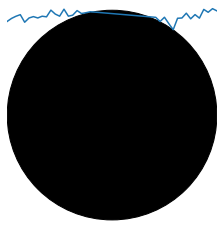

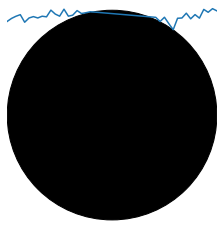

 tic2 357686299

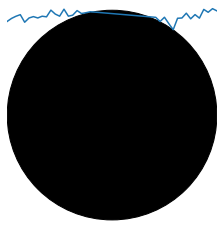

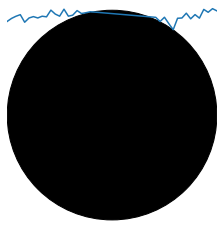

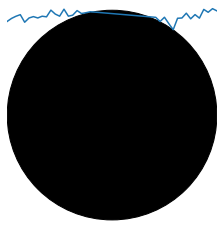


 tic1 357686299
 tic1 357686299

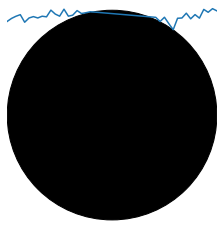

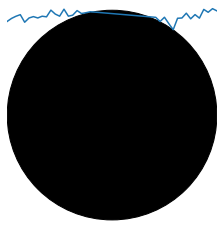

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


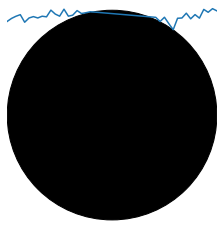

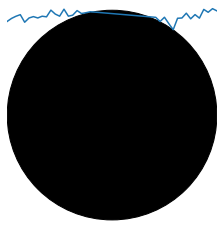

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299
 tic1 357686299








/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
[0] tic2 357686299
 tic2 357686299

[0][0]

 tic2 357686299
 tic2 357686299
[0][0][0]
[0]

 tic2 357686299

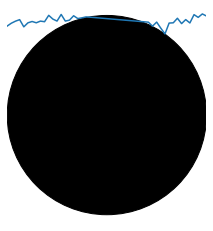


 tic2 357686299


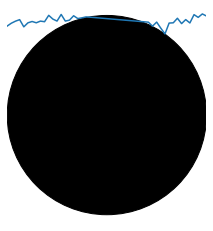


 tic2 357686299 tic2 357686299



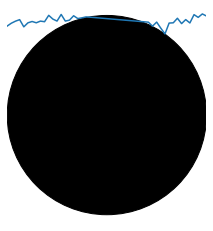

 tic1 357686299
 tic1 357686299


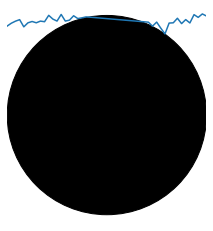

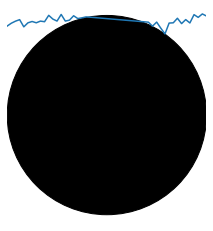

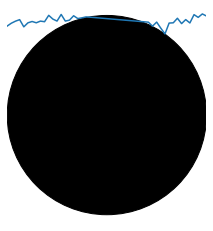

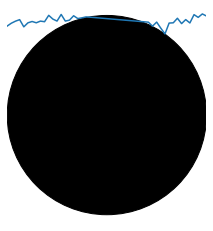

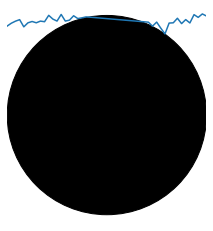

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


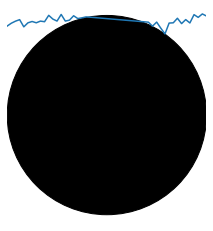

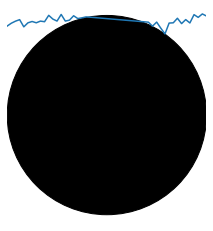

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0]

 tic2 357686299 tic2 357686299[0]
 tic2 357686299
[0]
 tic2 357686299


[0][0]
 tic2 357686299

 tic2 357686299[0]
[0]

 tic2 357686299 tic2 357686299



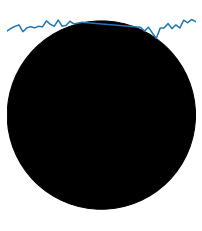

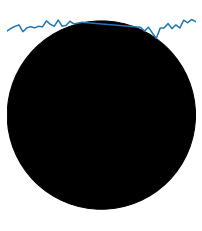

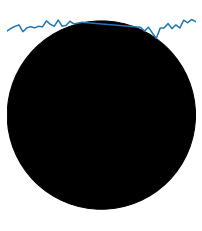

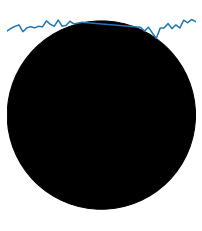

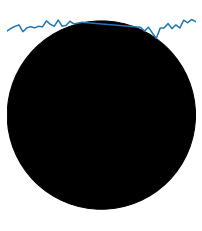

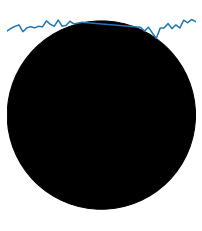

 tic1 357686299


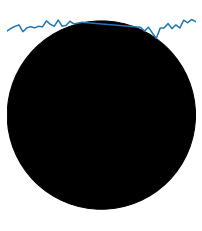

 tic1 357686299


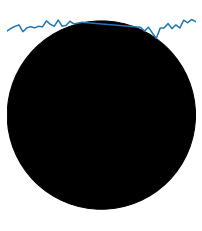

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


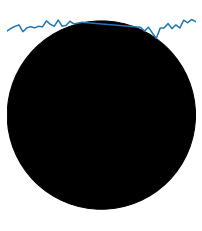

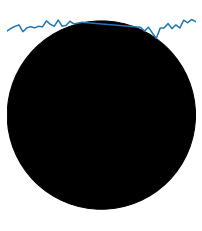

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299





 tic1 357686299



/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
[0] tic2 357686299[0]

 tic2 357686299[0]
[0] tic2 357686299[0]

 tic2 357686299


[0]
 tic2 357686299
 tic2 357686299[0]

 tic2 357686299

 tic2 357686299


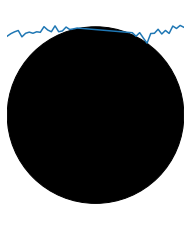

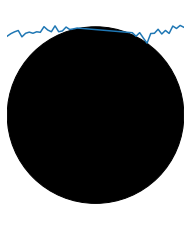

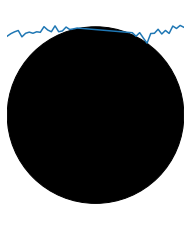

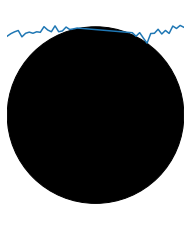

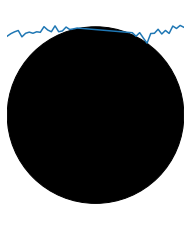

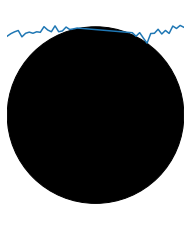

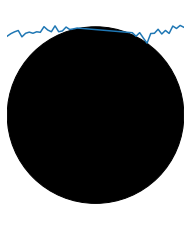

 tic1 357686299 tic1 357686299



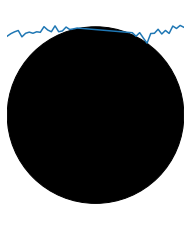

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


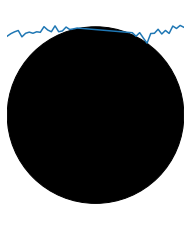

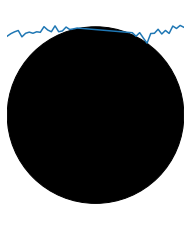

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299[0]
[0]
[0]
 tic2 357686299[0][0]

 tic2 357686299
 tic2 357686299
 tic2 357686299

 tic2 357686299[0]


 tic2 357686299


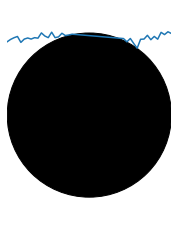

[0]

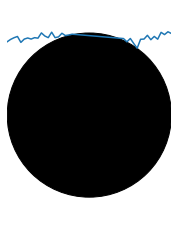


 tic2 357686299

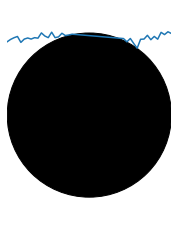

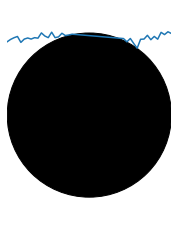


 tic1 357686299


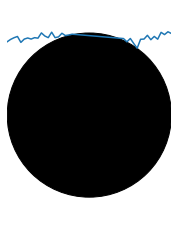

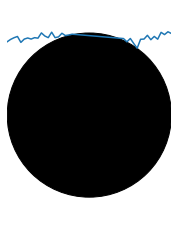

 tic1 357686299


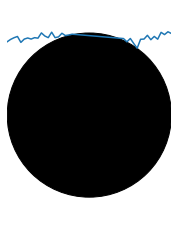

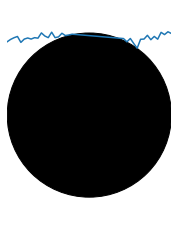

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


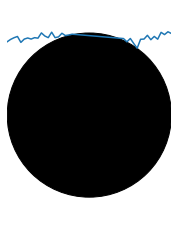

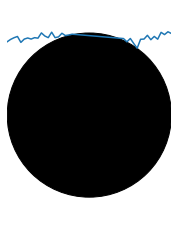

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0]
 tic2 357686299[0]
[0]
[0]
[0] tic2 357686299
[0]
 tic2 357686299

 tic2 357686299

 tic2 357686299[0] tic2 357686299




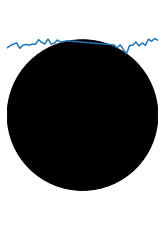

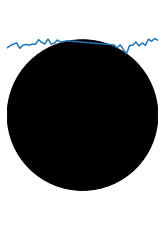

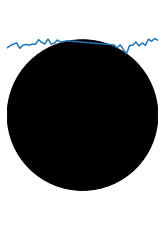

 tic2 357686299


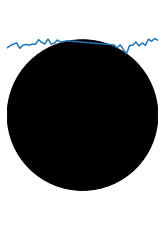

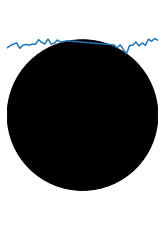

 tic1 357686299
 tic1 357686299


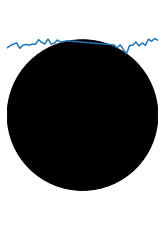

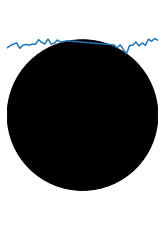

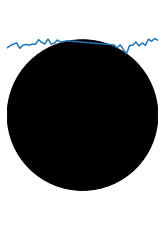

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


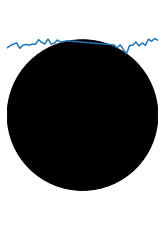

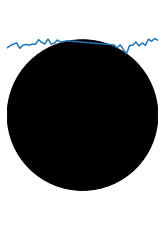

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0]
 tic2 357686299
[0]
[0] tic2 357686299


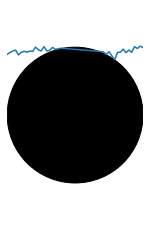


 tic2 357686299
[0]

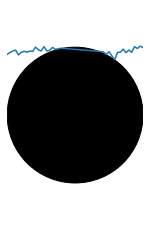


 tic2 357686299 tic1 357686299



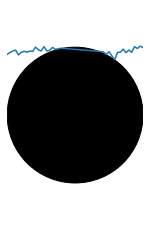

 tic1 357686299


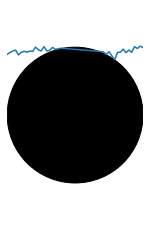

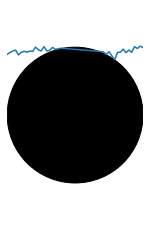

[0]
 tic2 357686299
[0]
 tic2 357686299


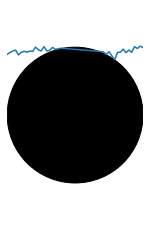

[0]
 tic2 357686299


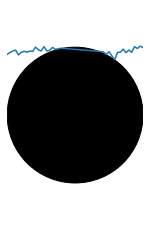

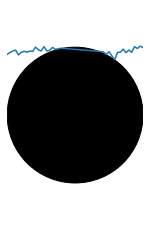

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


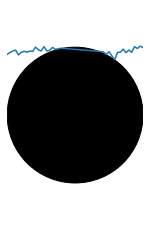

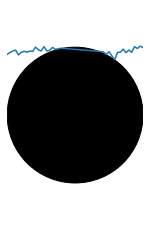

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299


 tic1 357686299






/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0]
[0] tic2 357686299[0]

 tic2 357686299


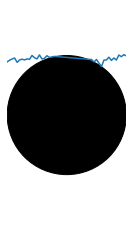


 tic2 357686299
 tic1 357686299[0]
[0]
 tic2 357686299

 tic2 357686299

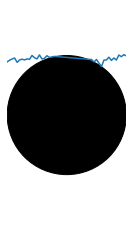

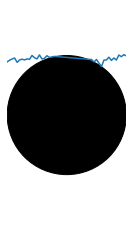

[0]

[0]
 tic2 357686299 tic1 357686299

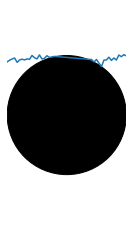

 tic2 357686299




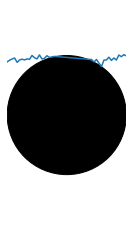

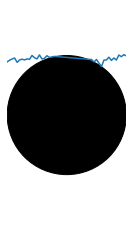

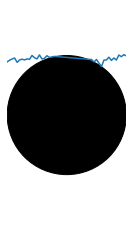

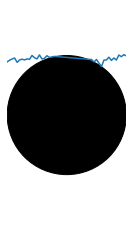

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299

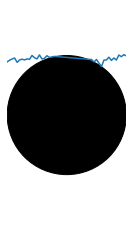

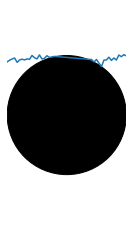

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299[0]
[0]

 tic2 357686299 tic2 357686299
[0][0]


[0] tic2 357686299[0]
 tic2 357686299 tic2 357686299[0]

 tic2 357686299





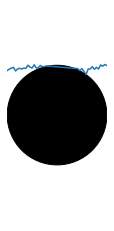

 tic2 357686299


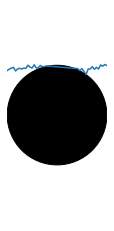

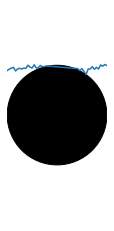

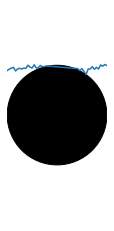

 tic1 357686299


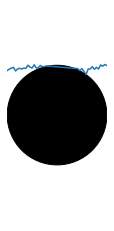

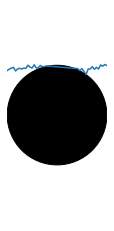

 tic1 357686299


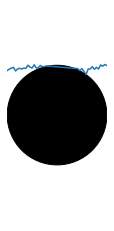

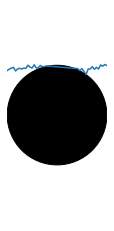

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


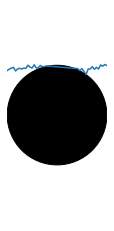

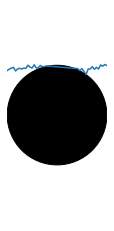

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0]

 tic2 357686299 tic2 357686299[0]


[0] tic2 357686299
[0] tic2 357686299


[0] tic2 357686299
[0] tic2 357686299

[0]



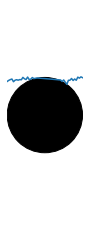

 tic2 357686299


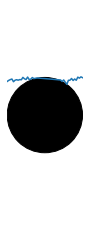

 tic2 357686299

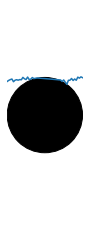


 tic1 357686299

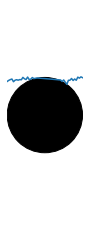


 tic1 357686299

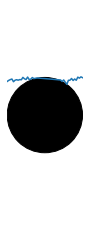

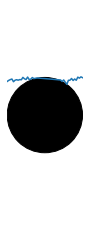

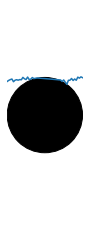

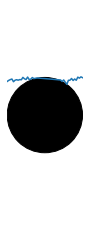

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


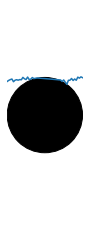

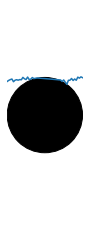

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0]

 tic2 357686299 tic2 357686299

[0]
[0][0] tic2 357686299

[0] tic2 357686299
 tic2 357686299


 tic2 357686299
[0]


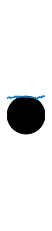

 tic2 357686299

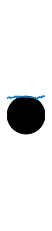

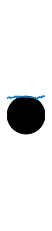

[0]

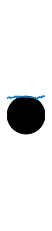


 tic1 357686299

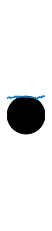

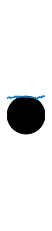


 tic1 357686299 tic2 357686299



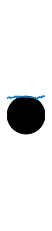

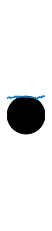

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


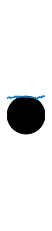

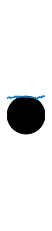

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299



 tic1 357686299





/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0]
 tic2 357686299
[0]
[0] tic2 357686299
[0][0]

 tic2 357686299

 tic2 357686299

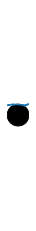


 tic2 357686299


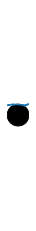

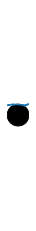

[0] tic1 357686299

 tic2 357686299

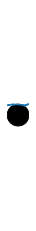

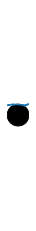

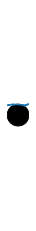

 tic1 357686299
[0]
 tic2 357686299


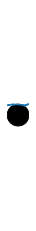

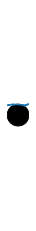

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299


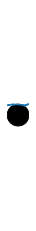

[0]
 tic2 357686299


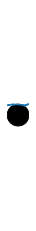

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0]
 tic2 357686299[0]
[0][0]
[0]
 tic2 357686299
 tic2 357686299

[0]
 tic2 357686299 tic2 357686299
[0]
 tic2 357686299


 tic2 357686299


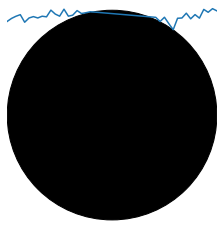

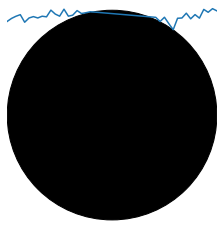

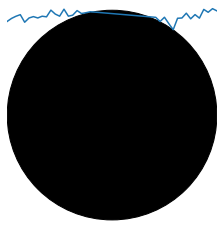

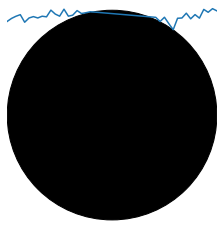

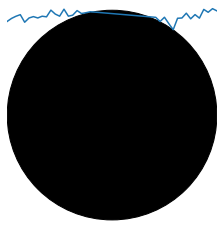

 tic1 357686299 tic1 357686299

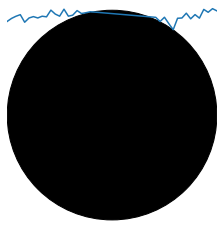

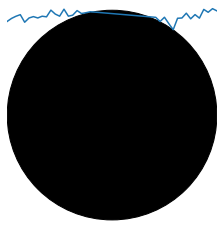

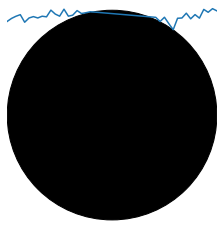

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


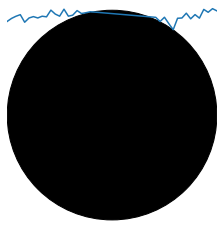

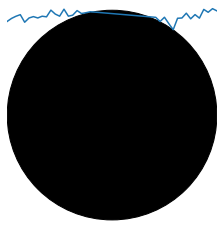

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0][0]

[0] tic2 357686299 tic2 357686299

[0]


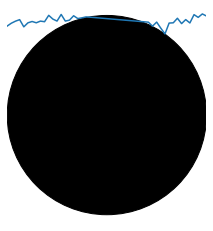


 tic2 357686299[0] tic2 357686299
[0] tic2 357686299



 tic2 357686299 tic1 357686299[0]


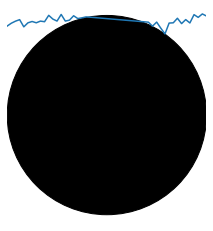

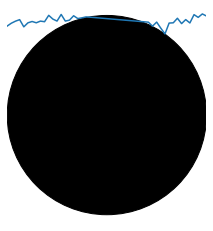



 tic2 357686299
 tic1 357686299


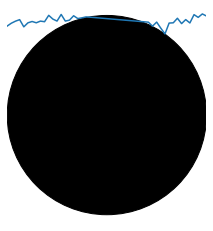

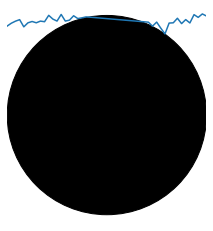

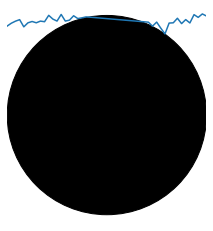

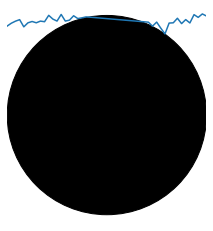

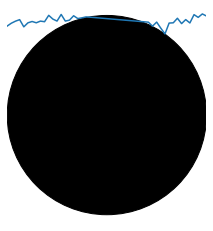

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
[0] tic2 357686299

 tic2 357686299


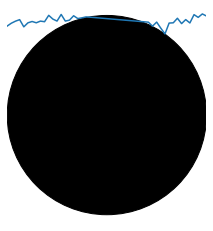

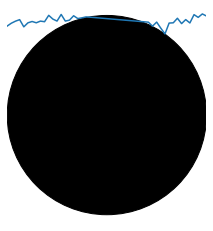

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
[0] tic2 357686299

 tic2 357686299
[0][0]
[0]

 tic2 357686299 tic2 357686299
 tic2 357686299

[0][0]

[0] tic2 357686299
 tic2 357686299 tic2 357686299


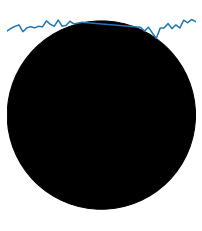

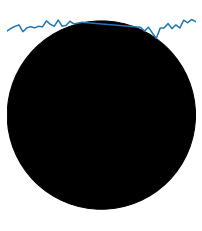

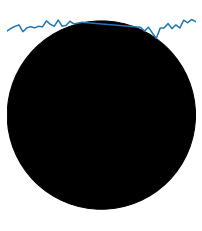

 tic1 357686299 tic1 357686299

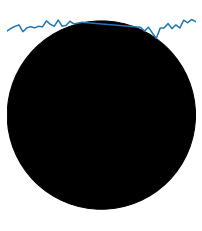

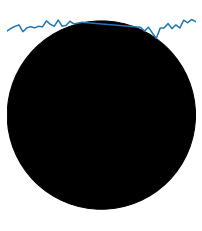

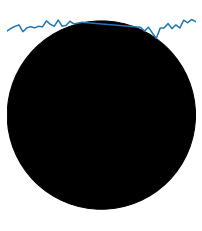

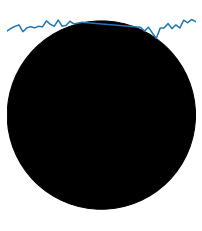

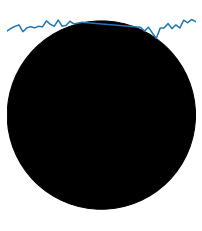

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0][0]

 tic2 357686299 tic2 357686299



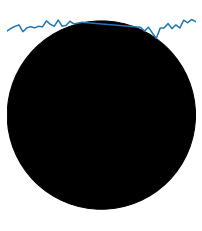

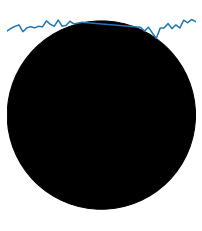

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299


 tic1 357686299 tic1 357686299






/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0][0][0]
 tic2 357686299

 tic2 357686299

[0][0][0]
 tic2 357686299 tic2 357686299[0]

 tic2 357686299


 tic2 357686299 tic2 357686299




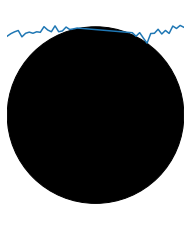

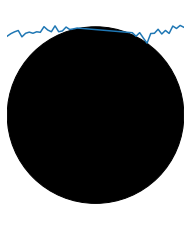

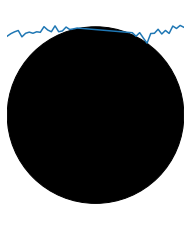

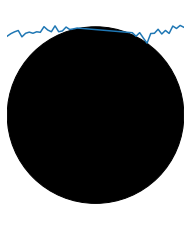

 tic1 357686299 tic1 357686299

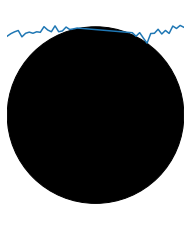

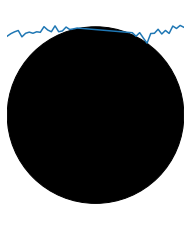

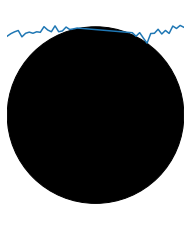

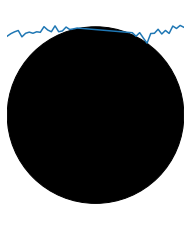

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


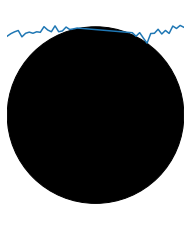

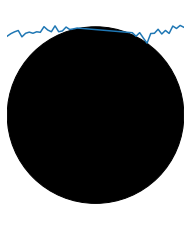

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299




 tic1 357686299




/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0]
[0]
 tic2 357686299
 tic2 357686299
[0] tic2 357686299


[0]
 tic2 357686299[0][0]

 tic2 357686299
[0]
 tic2 357686299 tic2 357686299
 tic2 357686299



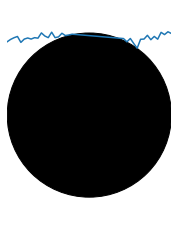

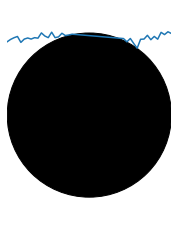

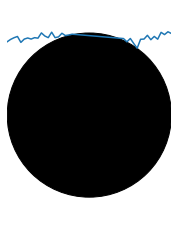

 tic1 357686299
 tic1 357686299


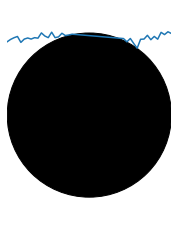

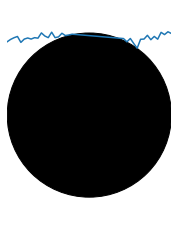

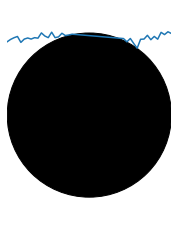

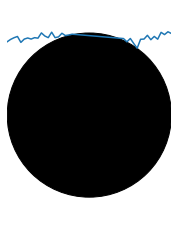

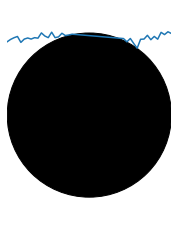

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


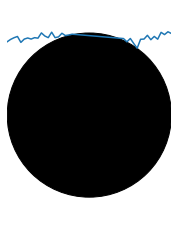

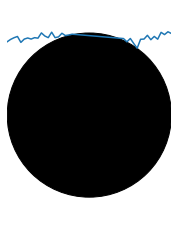

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299


 tic1 357686299






/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0]

 tic2 357686299[0] tic2 357686299

[0]
 tic2 357686299

 tic2 357686299
[0]

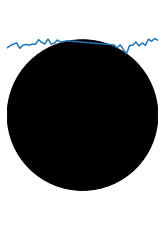

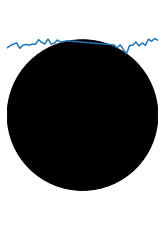

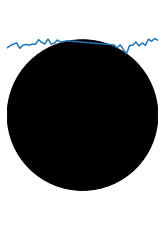

[0] tic2 357686299

 tic2 357686299 tic1 357686299 tic1 357686299



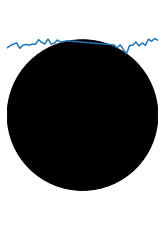

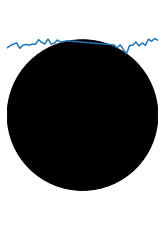

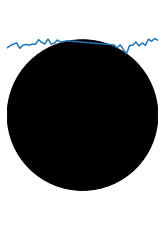

[0][0]

 tic2 357686299 tic2 357686299



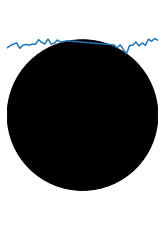

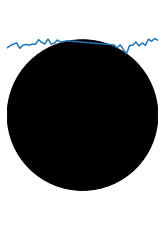

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


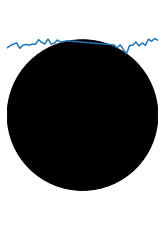

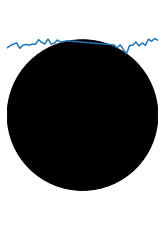

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
[0] tic2 357686299

[0]
 tic2 357686299 tic2 357686299
[0]

[0] tic2 357686299
 tic2 357686299

[0]

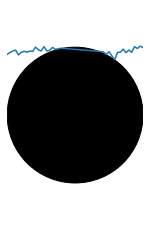

[0]

 tic2 357686299 tic2 357686299

[0]

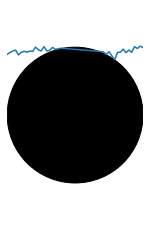

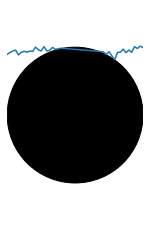

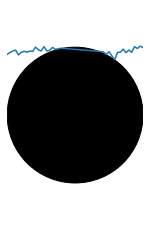

 tic1 357686299
 tic2 357686299

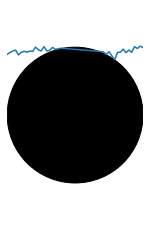


 tic1 357686299

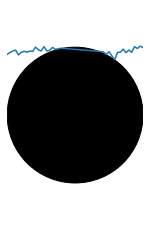

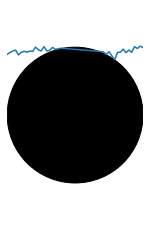

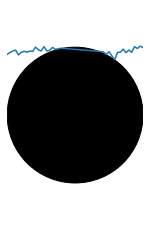

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


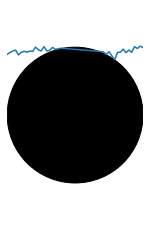

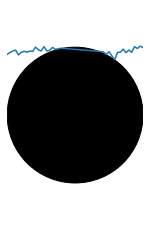

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0]

 tic2 357686299[0]
 tic2 357686299
[0] tic2 357686299


 tic2 357686299
[0][0]
[0][0] tic2 357686299


 tic2 357686299
 tic2 357686299 tic2 357686299




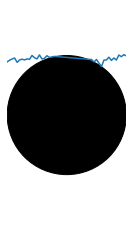

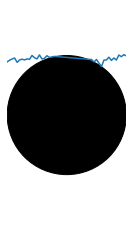

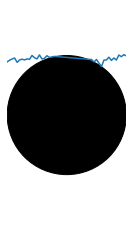

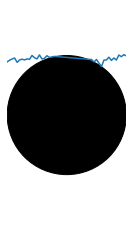

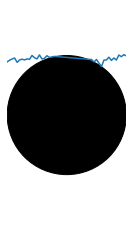

 tic1 357686299 tic1 357686299



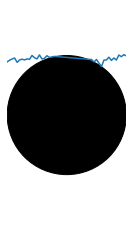

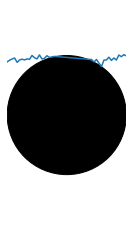

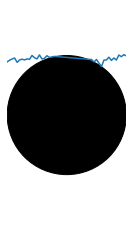

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


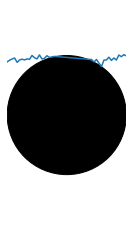

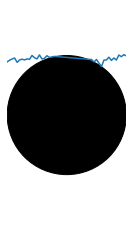

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0][0][0][0]

 tic2 357686299
 tic2 357686299
 tic2 357686299 tic2 357686299



[0]
[0] tic2 357686299
 tic2 357686299[0]


 tic2 357686299

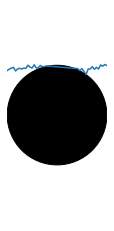

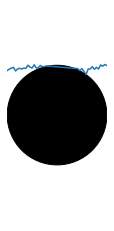

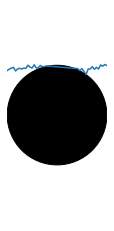

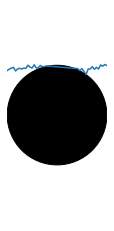

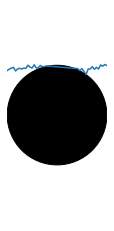

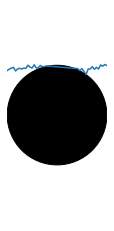

 tic1 357686299 tic1 357686299



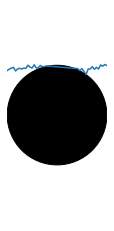

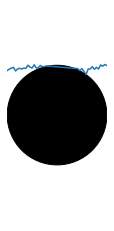

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


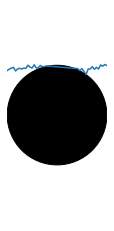

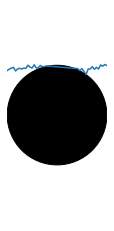

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0][0][0]
 tic2 357686299

[0] tic2 357686299

 tic2 357686299[0]


[0] tic2 357686299 tic2 357686299


 tic2 357686299[0]

[0] tic2 357686299


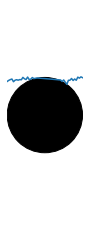

 tic2 357686299

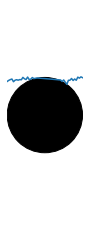

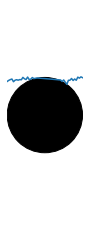

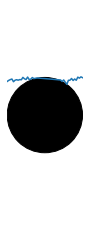

 tic1 357686299

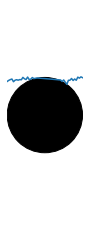


 tic1 357686299

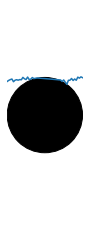

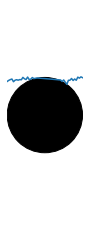

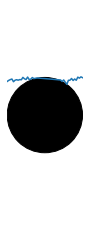

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


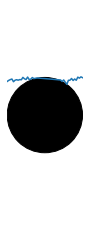

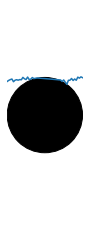

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299



 tic1 357686299





/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0]
[0] tic2 357686299

[0]
 tic2 357686299
 tic2 357686299


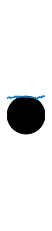

[0][0]

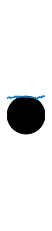


[0] tic2 357686299



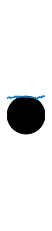


 tic2 357686299

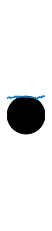

 tic1 357686299 tic2 357686299

 tic1 357686299
[0]

 tic2 357686299

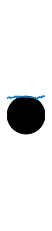

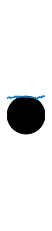

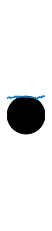

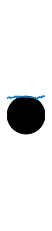

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299


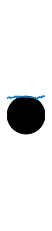

[0]
 tic2 357686299


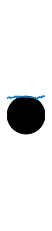

 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299 tic1 357686299









/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the 

[0]
 tic2 357686299
[0][0]

 tic2 357686299 tic2 357686299

[0][0]
 tic2 357686299[0]




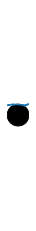

 tic2 357686299 tic2 357686299

[0]
[0]
 tic2 357686299

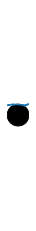

 tic2 357686299



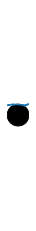

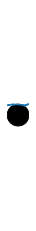

 tic1 357686299 tic1 357686299

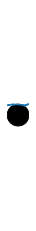

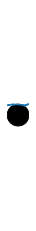

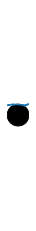

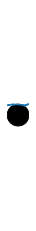

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


[0]
 tic2 357686299
[0]
 tic2 357686299


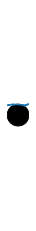

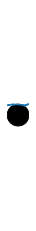

In [59]:
import multiprocessing
shape = 'Circle'
tic_id = '357686299'
def process_data(args):
    w, d, t_ref , tic_id = args
    len_obj = 1/d
    v = 2*(1 + (len_obj)) / w
    print(f' tic1 {tic_id}')
    
    #v = v.round(decimals=2)
    #d = d.round(decimals=2)
    
    make_shape(d, v, shape, t_ref)
    width, depth = find_width_depth(shape, d, v, t_ref)
    make_lc(shape, d, v, tic_id, t_ref)
    mstat = calc_mstat(tic_id, shape, d, v, t_ref)
    
    len_obj = 1/d
    return w, depth, t_ref, mstat, len_obj



global widths, depths, t_refs, feats_dict

if shape == 'Triangle':
    depths = np.array([0.07, 0.16, 0.25, 0.34, 0.43, .49])
    depths = 1 / np.sqrt(1 - 2 * depths)
else:
    depths = np.array([0.07, 0.16, 0.25, 0.34, 0.43, 0.52, 0.61, 0.70, 0.79, 0.88, 0.97, .99])
    depths = 1 / np.sqrt(1 - depths)
widths = np.array([.3, .4, .5, .7, 1.0, 1.8])
widths = np.array([1.,2.,3.,4.,5.,6.])
#how do I change the velocities so that the widths are the same every time? it'll depend on depth
t_refs = np.array(range(8, 18))

results = []
len_objs = np.array([])
with multiprocessing.Pool() as pool:
    for w in widths:
        for d in depths:

            args_list = [(w, d, t_ref, tic_id) for t_ref in t_refs]

            results.extend(pool.map(process_data, args_list)) #figure out what's going on in here
    #print(len_objs)
results_widths = np.array([r[0] for r in results])
results_depths = np.array([r[1] for r in results])
results_t_refs = np.array([r[2] for r in results])
mstats = np.array([r[3] for r in results])
len_objs = np.array([r[4] for r in results])

In [60]:
mstats = np.array([])
for w in widths:
    for d in depths:        
        for t_ref in t_refs:
            len_obj = 1/d
            #v = v.round(decimals=2)
            #d=d.round(decimals=2

            v = 2*(1 + (len_obj)) / w
            mstat = calc_mstat(tic_id, shape, d, v, t_ref)
            mstats = np.append(mstats, mstat)

In [61]:
feats_dict = {#"Circle":get_test_features('Circle'), 
              "Square":get_test_features('Square'), 
              #"Triangle":get_test_features('Triangle')
                }



AttributeError: 'DataFrame' object has no attribute 'feats'

longtermtrend  meanmedrat     skews     varss  coeffvar  stds  \
468603196.0       0.003580    1.000476  0.000013  0.003578      47.0  14.0   
428047465.0       0.062522    1.008662  0.003909  0.061985     114.0   8.0   
368686574.0       0.024312    0.998920  0.000591  0.024338      51.0   2.0   
229948967.0       0.006656    0.999734  0.000044  0.006658     118.0   0.0   
427605720.0       0.005271    1.000979  0.000028  0.005266      78.0  18.0   
...                    ...         ...       ...       ...       ...   ...   
370346985.0       0.004043    1.000093  0.000016  0.004043     163.0   0.0   
319919602.0       0.080891    1.015077  0.006543  0.079689      59.0  10.0   
72147657.0        0.007434    1.000506  0.000055  0.007431      38.0  10.0   
423745782.0       0.013660    0.997403  0.000187  0.013696      84.0   4.0   
252183838.0       0.018624    1.002895  0.000347  0.018570      45.0  11.0   

             numoutliers  numnegoutliers  numposoutliers  numout1s  ...  \
468603196.0          0.0            14.0        0.000499  0.029888  ...   
428047465.0          0.0             8.0        0.019309  0.802941  ...   
368686574.0          9.0            11.0        0.003986  0.188489  ...   
229948967.0          8.0             8.0        0.002189  0.098121  ...   
427605720.0          0.0            18.0        0.001408  0.073047  ...   
...                  ...             ...             ...       ...  ...   
370346985.0          5.0             5.0        0.001764  0.121761  ...   
319919602.0          0.0            10.0        0.009306  0.429727  ...   
72147657.0           0.0            10.0        0.001005  0.060480  ...   
423745782.0         22.0            26.0        0.002034  0.183525  ...   
252183838.0          0.0            11.0        0.001710  0.089550  ...   

             sautocorrcoef  autocorrcoef  flatmean  tflatmean  roundmean  \
468603196.0       0.923077      0.081493  0.158590   0.244554   0.349302   
428047465.0       0.615866      0.103875  0.185354   0.289609   0.434939   
368686574.0       0.905858      0.106652  0.190508   0.296787   0.411246   
229948967.0       0.699593      0.108316  0.194713   0.280470   0.387611   
427605720.0       0.846154      0.086255  0.154614   0.242480   0.339913   
...                    ...           ...       ...        ...        ...   
370346985.0       0.549521      0.121264  0.209435   0.331420   0.463553   
319919602.0       0.912673      0.045612  0.073301   0.114884   0.181343   
72147657.0        0.938025      0.132137  0.237792   0.360413   0.510293   
423745782.0       0.867925      0.052584  0.093496   0.139758   0.214712   
252183838.0       0.933972      0.057434  0.111308   0.165742   0.235932   

             troundmean  roundrat   flatrat  mstat     astat  
468603196.0    0.521881  0.036975  1.574173 -0.705  0.050786  
428047465.0    0.703584  0.803050  3.085491 -0.635  0.241227  
368686574.0    0.647175  0.283212  0.764814  0.335  0.171377  
229948967.0    0.587833  0.078008  0.706946  0.302  0.274354  
427605720.0    0.545593  0.044444  1.348827 -0.814  0.148449  
...                 ...       ...       ...    ...       ...  
370346985.0    0.711950  0.038877  0.776343  0.046  0.123545  
319919602.0    0.300610  1.028483  2.640946 -0.933  0.441716  
72147657.0     0.717390  0.111247  3.016553 -0.501  0.053825  
423745782.0    0.496019  0.104734  1.332518  0.443  0.589180  
252183838.0    0.368251  0.245763  2.609157 -0.745  0.066031  

[10000 rows x 62 columns]

In [26]:
results_rankings = function(shape).ranks.values
print(results_rankings)

       scores     ranks
0    0.001237   30412.0
1    0.001183   34924.0
2    0.000634  393395.0
3    0.000636  387513.0
4    0.000636  387363.0
..        ...       ...
715  0.000643  368330.0
716  0.000644  364254.0
717  0.000623  430542.0
718  0.000621  435625.0
719  0.000635  390046.0

[720 rows x 2 columns]


In [344]:
print(len(results_rankings))
print(len(mstats))
scores = pd.DataFrame({'Mstats': mstats, 'Rankings': results_rankings})
scores["Detected"] = ((scores["Mstats"] > 0.25) & (scores["Rankings"] < 80000)).astype(int)
print(scores)
averaged_detected = np.mean(scores["Detected"].values.reshape(-1, len(t_refs)), axis=1)
print(len(averaged_detected))

720
720
       Mstats  Rankings  Detected
0    0.919623   17232.0         1
1    0.910672   15965.0         1
2    0.328412   40451.0         1
3    0.105447  106294.0         0
4    0.107491  102958.0         0
..        ...       ...       ...
715  0.320637   38813.0         1
716  0.310644   50999.0         1
717  0.277153   58115.0         1
718  0.217747   58067.0         0
719  0.171830   61062.0         0

[720 rows x 3 columns]
72


In [345]:
n_results_widths = results_widths[::10]
n_results_depths = results_depths[::10]
print(len(n_results_widths), len(averaged_detected), len(scores['Mstats']))

mstats_avg = np.mean(scores["Mstats"].values.reshape(-1, len(t_refs)), axis=1)
print(len(mstats_avg))
rankings_avg = np.mean(scores["Rankings"].values.reshape(-1, len(t_refs)), axis=1)
print(len(rankings_avg))
data = pd.DataFrame({'Width': n_results_widths, 'Event Depth': n_results_depths, 'Mstats' : mstats_avg})
print(data)

72 72 720
72
72
    Width  Event Depth    Mstats
0     1.0     0.015988  0.682894
1     1.0     0.044392  0.681439
2     1.0     0.089589  0.679998
3     1.0     0.162014  0.677128
4     1.0     0.243029  0.677332
..    ...          ...       ...
67    6.0     0.579778  1.427639
68    6.0     0.698620  1.374447
69    6.0     0.822622  1.248475
70    6.0     0.955665  0.655637
71    6.0     0.984540  0.259606

[72 rows x 3 columns]


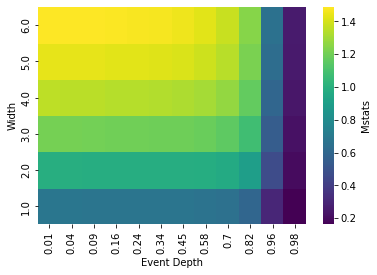

Text(0, 0.5, 'Mstats')

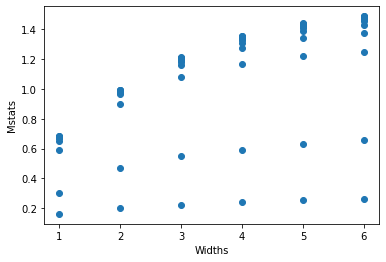

In [346]:
import seaborn as sns

n_results_depths = n_results_depths.round(decimals=2)
data = pd.DataFrame({'Width': n_results_widths, 'Event Depth': n_results_depths, 'Mstats' : mstats_avg})
#data = pd.DataFrame({'Width': n_results_widths, 'Event Depth': n_results_depths, 'Rankings' : rankings_avg})

data['Event Depth'] = data['Event Depth'].replace(0.02, 0.01)



data_pivoted = data.pivot("Width", "Event Depth", "Mstats")
#data_pivoted = data.pivot("Width", "Event Depth", "Rankings")

data_pivoted = sns.heatmap(data_pivoted, cmap="viridis")
#pd.plot(kind='RonR',rot=0)



#plt.title(str(noise) + " noise transit detection rate")
data_pivoted.collections[0].colorbar.set_label("Mstats")
#data_pivoted.collections[0].colorbar.set_label("Rankings")

data_pivoted.invert_yaxis()
plt.show()

# os.makedirs('./heatmap_data_mag_' + str(mag_bin),exist_ok=True)
# data.to_csv('./heatmap_data_mag_' + str(mag_bin) + '/' + tic_id + '_heatmap.csv', index=False)#took 10 minutes



#for index, row in data.iterrows():
#    plt.plot(data.columns, row, label=f"Width {index}")

# Add legend
#plt.legend()

#plt.show()
plt.scatter( data['Width'],data['Mstats'],)
plt.xlabel('Widths')
plt.ylabel('Mstats')

In [71]:
#start 12:54
from time import gmtime, strftime
print (strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2023-07-17 20:02:27


In [ ]:
#note depth variance vs targeted depth
#change csv names to reflect width & depth

In [70]:
sample_subset = get_subset(18)
squares = get_test_features('Square')
circles = get_test_features('Circle')

        stds  meanmedrat     varss  coeffvar  numout1s  numposoutliers  \
0   0.166396    0.989648  0.027688  0.168450      68.0             9.0   
0   0.164518    0.989738  0.027066  0.166547      70.0             9.0   
0   0.105524    1.011312  0.011135  0.104366      57.0            13.0   
0   0.104520    1.012568  0.010925  0.103223      56.0            14.0   
0   0.104528    1.012564  0.010926  0.103231      55.0            14.0   
..       ...         ...       ...       ...       ...             ...   
0   0.105408    1.011583  0.011111  0.104274      58.0            13.0   
0   0.105485    1.011750  0.011127  0.104431      58.0            14.0   
0   0.105391    1.011494  0.011107  0.104414      58.0            14.0   
0   0.105041    1.011511  0.011034  0.104124      57.0            14.0   
0   0.104569    1.011748  0.010935  0.103669      50.0            14.0   

    numnegoutliers  numoutliers       mad  meanpslope  ...  sautocorrcoef  \
0             17.0         26.0  0

No handles with labels found to put in legend.


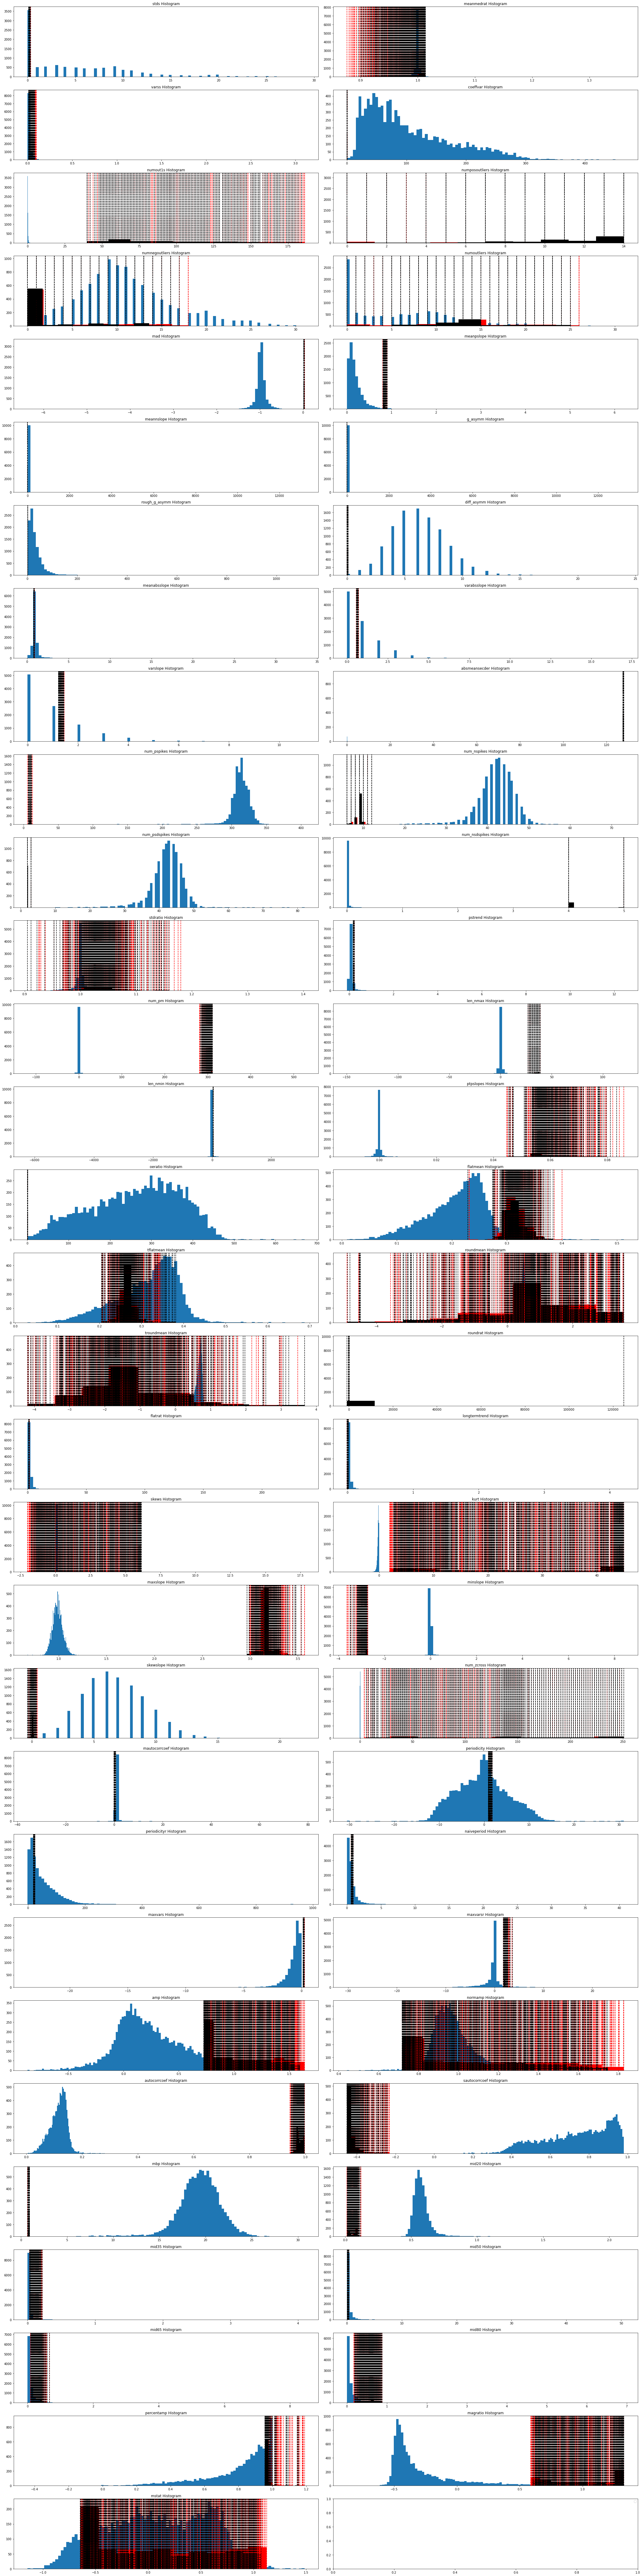

In [74]:
import pandas as pd
import matplotlib.pyplot as plt


#num_columns = features.shape[1]

num_rows = 6
num_cols = 11

fig, axs = plt.subplots(31, 2, figsize=(30,120))

axs = axs.flatten()

for i, column in enumerate(squares.columns):
    axs[i].hist(sample_subset[column], bins=100, label = 'sector 18 sample')
    axs[i].hist(squares[column], bins=10, color = 'red')
    axs[i].hist(circles[column],bins=10, color ='black')
    axs[i].set_title(f"{column} Histogram")
    
        
    for injected_value in squares[column]:
        axs[i].axvline(injected_value, color='red', linestyle='dashed', label = 'Squares')
    for value in circles[column]:
        axs[i].axvline(value, color='black', linestyle='dashed', label = "Circles")


plt.tight_layout()
plt.legend()
plt.show()